In [99]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
import InsanallyLabEphysTools as ilep
import OldDecodingTools as odt
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon, iqr
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from itertools import product
from datetime import datetime
import h5py
#import tables as tb
from copy import deepcopy
import colorsys
import pingouin as pg

from sklearn.model_selection import GridSearchCV, StratifiedKFold, LeaveOneOut
from sklearn.neighbors import KernelDensity

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
GOOD_GREY = '#969696'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'

NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)

 
act_directory = 'C:\\\\Users\\insan\\Documents\\Analysis_Cache\\Analysis_Cache'
ops_directory = 'C:\\\\Users\\insan\\Documents\\Opsin_Cache\\Opsin_Cache' # use when on pc
beh_directory = 'C:\\\\Users\\Insan\\Documents\\Behavioor'
#ops_directory = '/Users/mikeymalina/Data/Insanally/Opsin_Cache' # use when on mac


didnotlearnopsinanimals = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']
dualrecanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_61','BS_67','BS_70','BS_72','BS_87','BS_108'] # ,'DS_15','DS_19'

animalnames =  ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174', 'BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_61','BS_67','BS_70','BS_72','BS_87','BS_108']
animals = dict()
for animal in animalnames:
    animals[animal] = SimpleNamespace()
    animals[animal].name = animal
    
#Dual Recording Animals
animals['BS_67'].reversal = 7
animals['BS_108'].reversal = 7
animals['BS_40'].reversal = 18
animals['BS_41'].reversal = 6
animals['BS_42'].reversal = 7
animals['BS_49'].reversal = 13
animals['BS_50'].reversal = 12
animals['BS_51'].reversal = 8
animals['BS_56'].reversal = 8
animals['BS_59'].reversal = 7
animals['BS_61'].reversal = 9    ###
animals['BS_70'].reversal = 8
animals['BS_72'].reversal = 6
animals['BS_87'].reversal = 6


#Opsin Animals
animals['BS_86'].reversal = 14
#animals['BS_92'].reversal = 9
animals['BS_100'].reversal = 11
#animals['BS_103'].reversal = 8
#animals['BS_111'].reversal = 8
animals['BS_119'].reversal = 10
animals['BS_123'].reversal = 9
animals['BS_128'].reversal = 6
animals['BS_131'].reversal = 14
#animals['BS_139'].reversal = 10
animals['BS_163'].reversal = 13
#animals['BS_165'].reversal = np.Inf
animals['BS_174'].reversal = 14
#animals['BS_179'].reversal = 16
#animals['BS_191'].reversal = 10
#animals['BS_192'].reversal = 7

  2%|▏         | 9/533 [00:00<00:06, 79.60it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'


  5%|▍         | 25/533 [00:00<00:07, 65.14it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'


 10%|▉         | 53/533 [00:00<00:04, 102.61it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'


 12%|█▏        | 64/533 [00:00<00:05, 80.11it/s] 

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'


 14%|█▎        | 73/533 [00:00<00:06, 70.38it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'


 19%|█▊        | 99/533 [00:01<00:05, 76.44it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'


 26%|██▋       | 141/533 [00:01<00:03, 106.44it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.Sim

 30%|███       | 162/533 [00:05<00:38,  9.58it/s] 

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'


 37%|███▋      | 197/533 [00:09<00:28, 11.98it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'


 41%|████▏     | 221/533 [00:10<00:13, 23.00it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.Sim

 52%|█████▏    | 279/533 [00:10<00:04, 60.94it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'


 64%|██████▍   | 342/533 [00:10<00:01, 124.54it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.Sim

 68%|██████▊   | 362/533 [00:10<00:01, 122.88it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'


 74%|███████▍  | 397/533 [00:11<00:01, 133.17it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'


 78%|███████▊  | 414/533 [00:11<00:00, 122.70it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'


 84%|████████▎ | 446/533 [00:11<00:00, 118.78it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'


 93%|█████████▎| 494/533 [00:11<00:00, 137.66it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.Sim

 95%|█████████▌| 509/533 [00:12<00:00, 128.63it/s]

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.Sim

100%|██████████| 533/533 [00:12<00:00, 43.23it/s] 

'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.SimpleNamespace' object has no attribute 'day_of_reversal'
'types.Sim

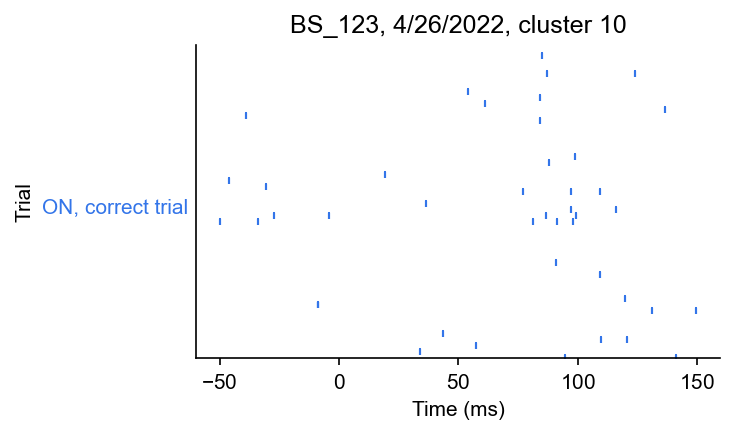

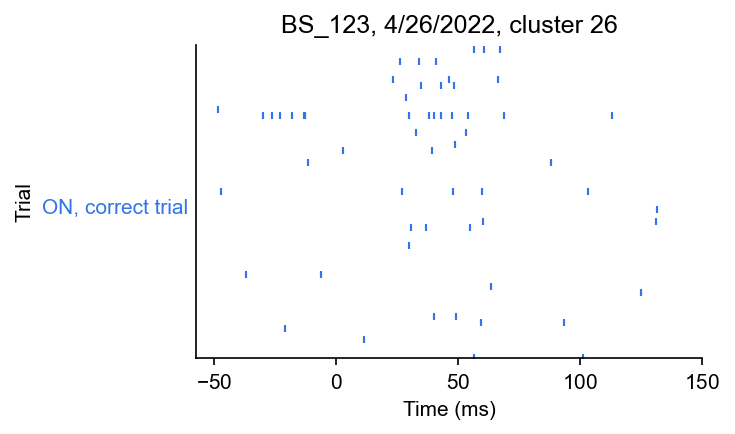

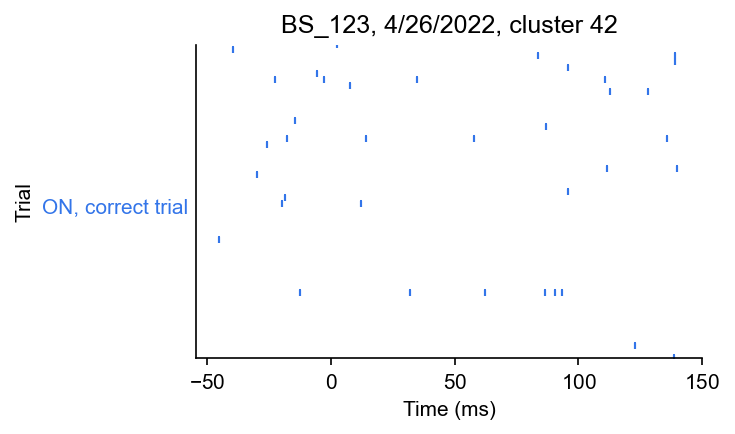

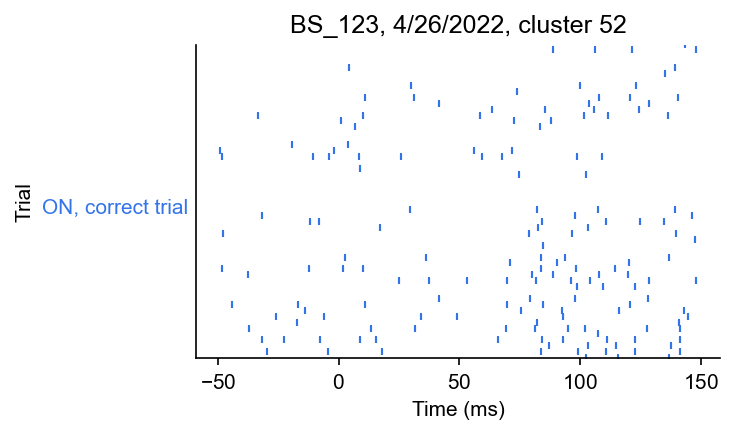

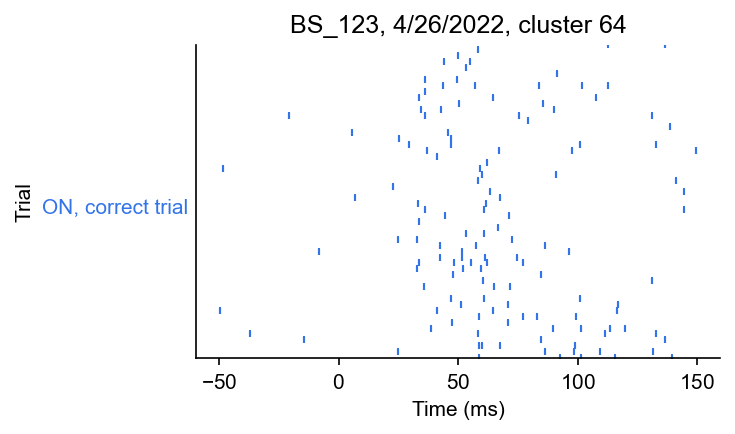

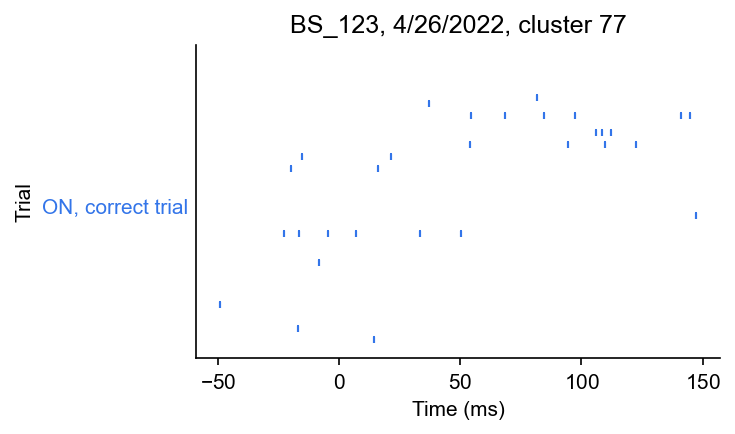

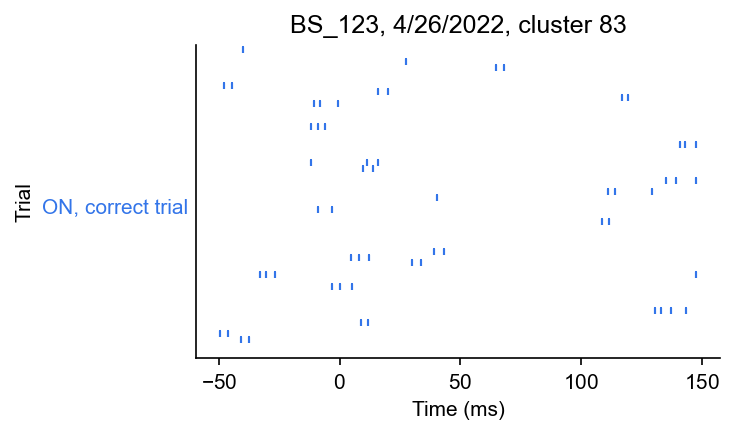

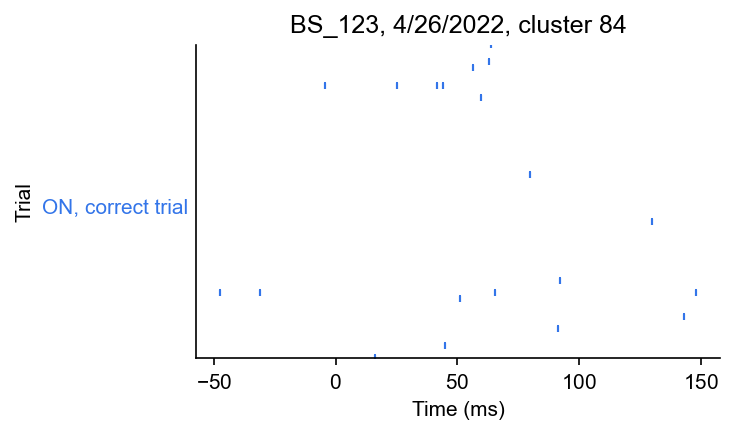

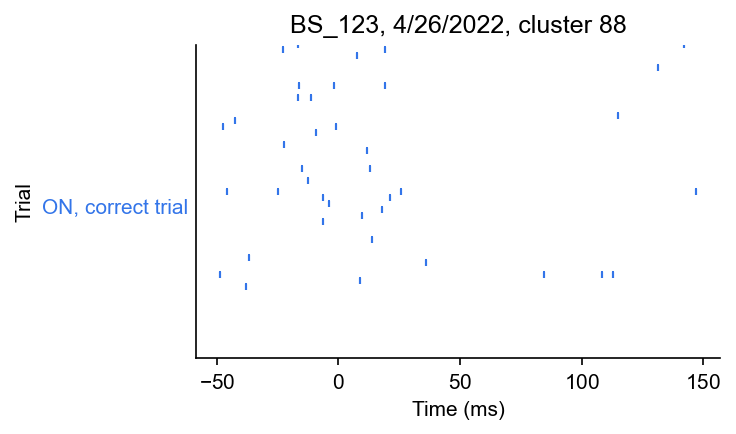

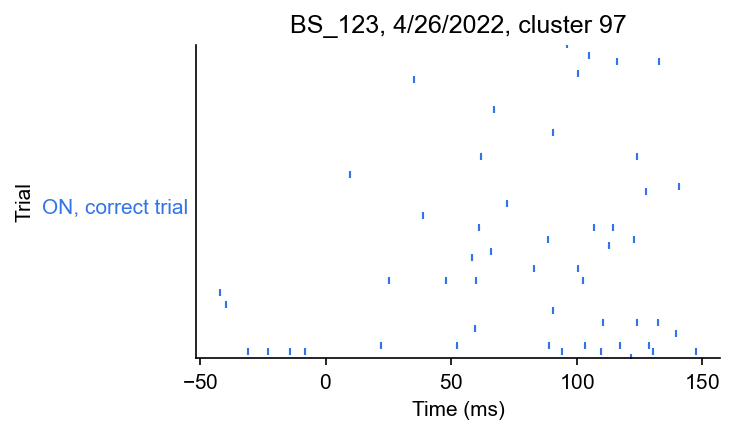

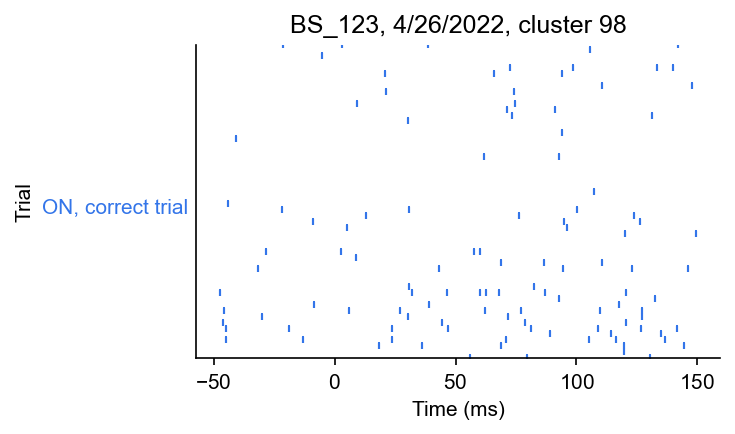

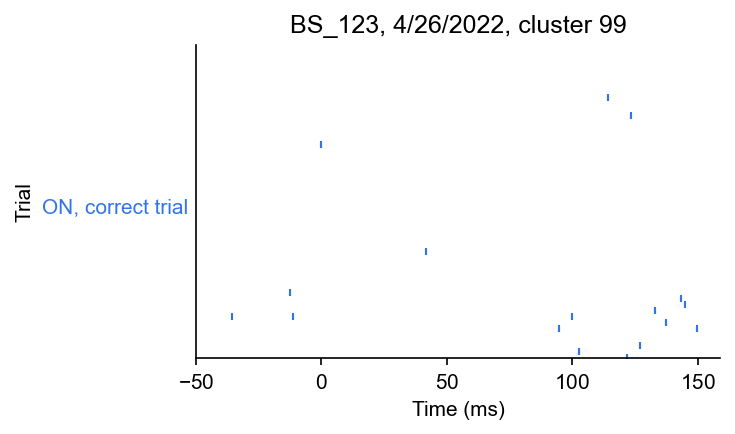

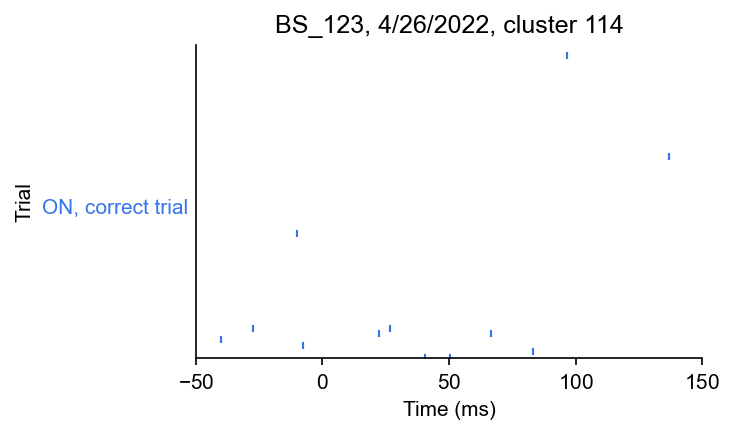

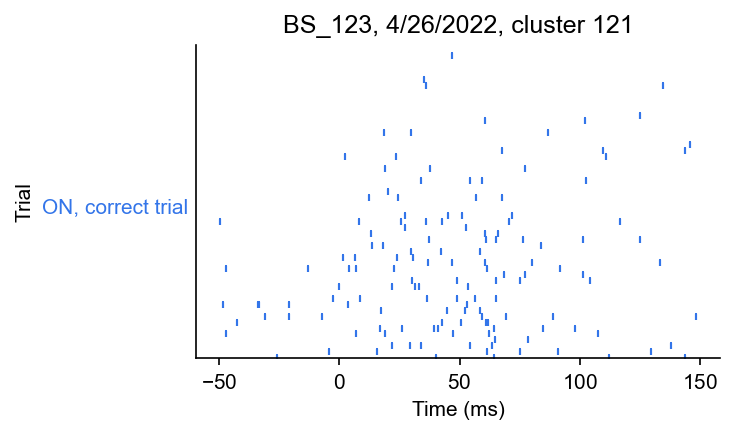

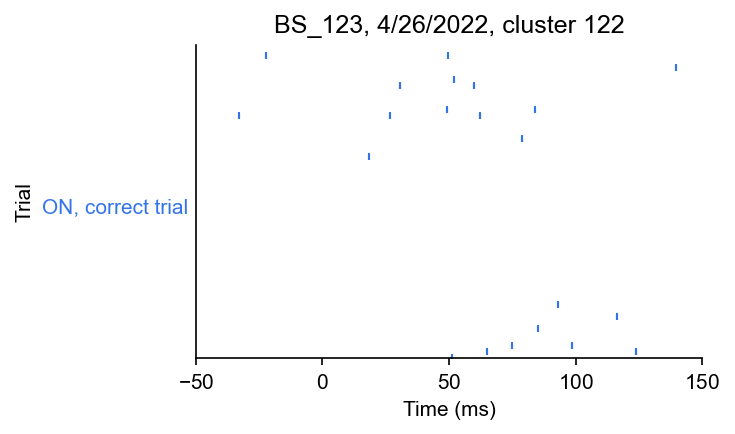

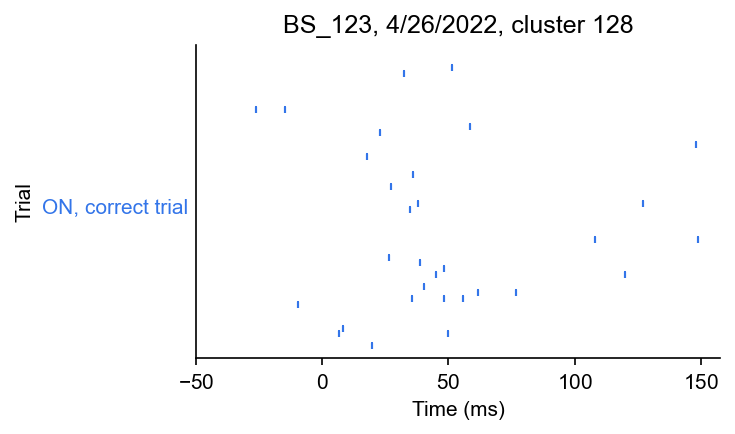

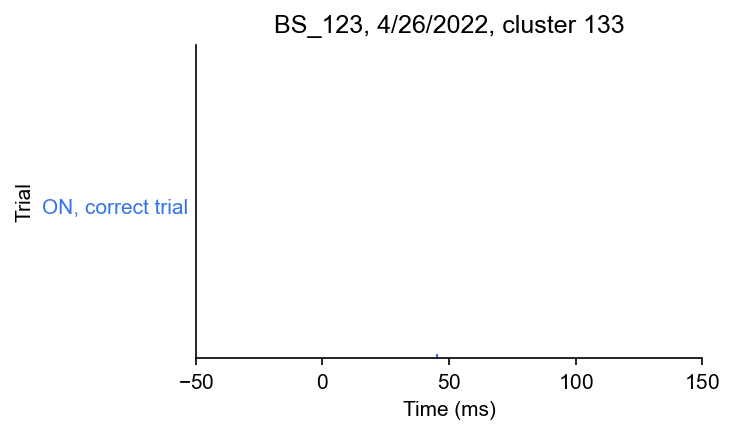

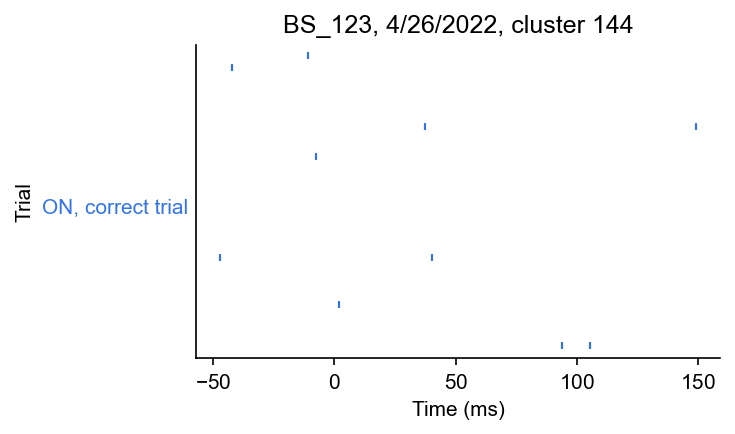

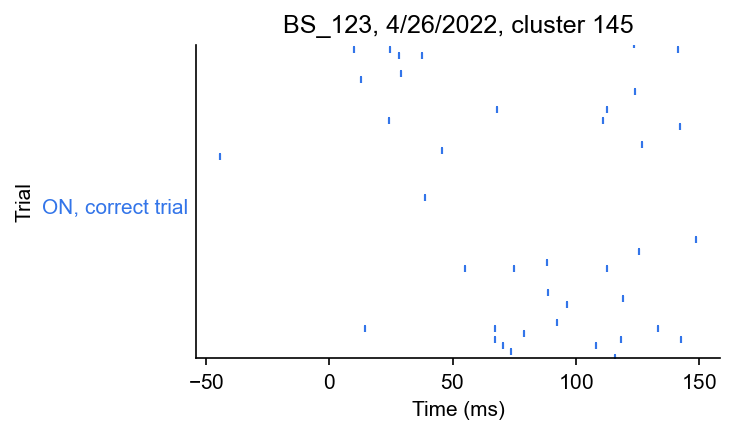

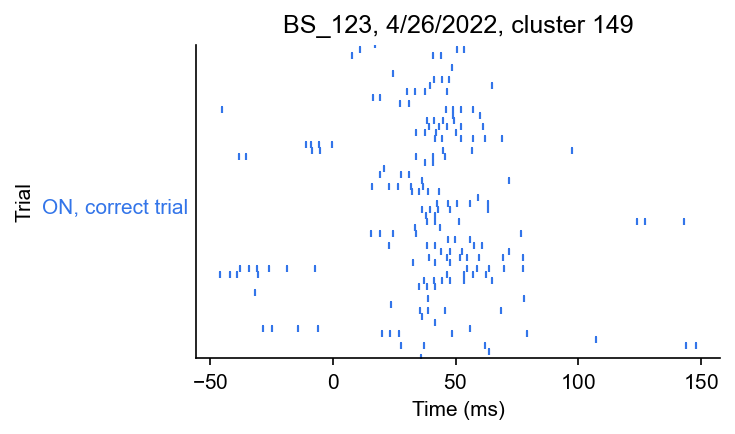

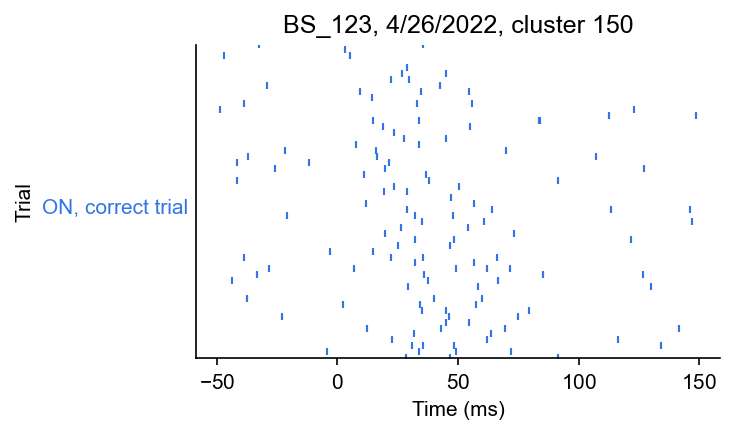

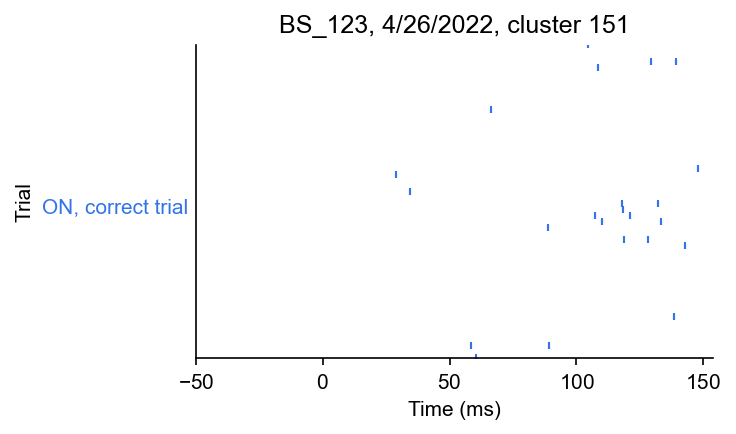

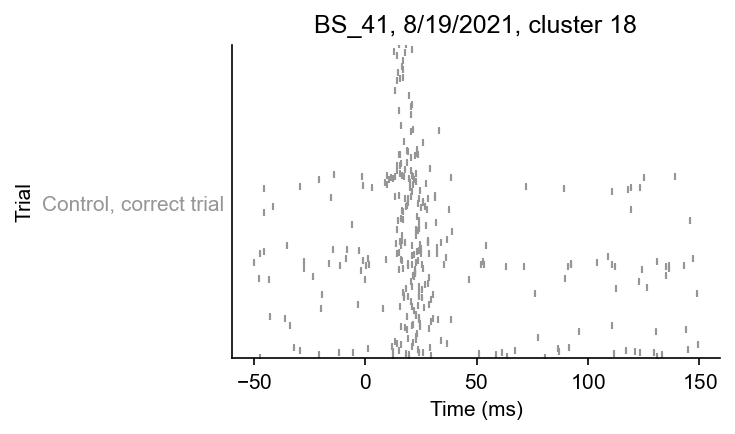

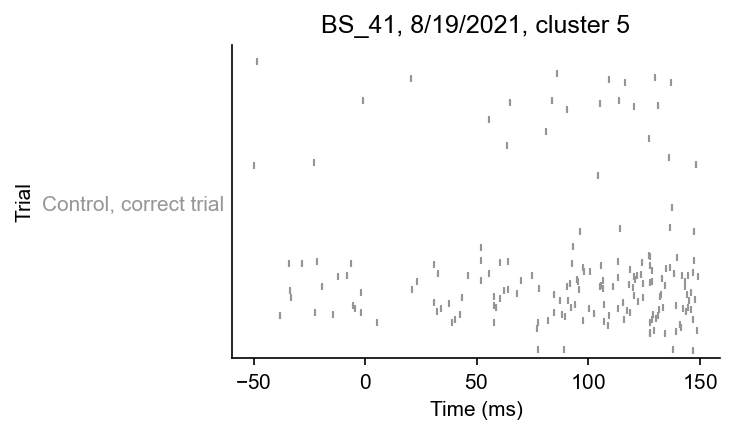

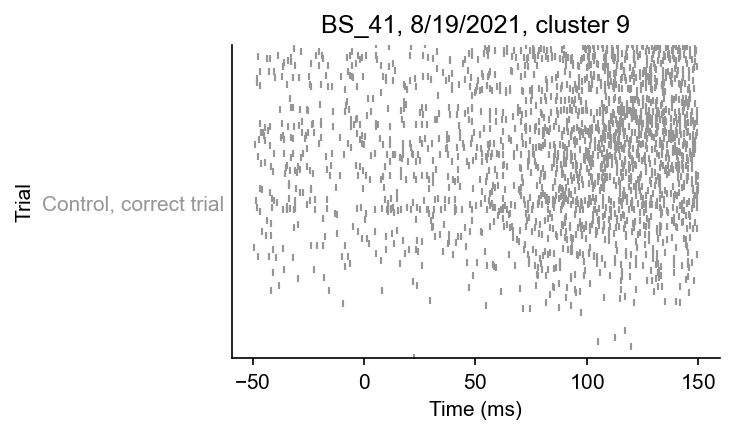

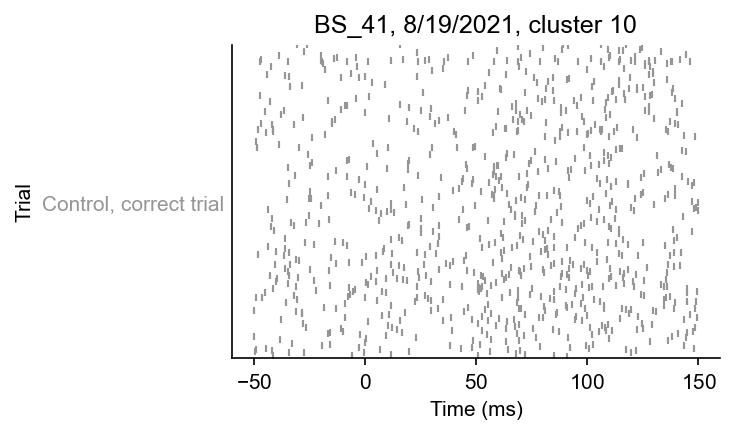

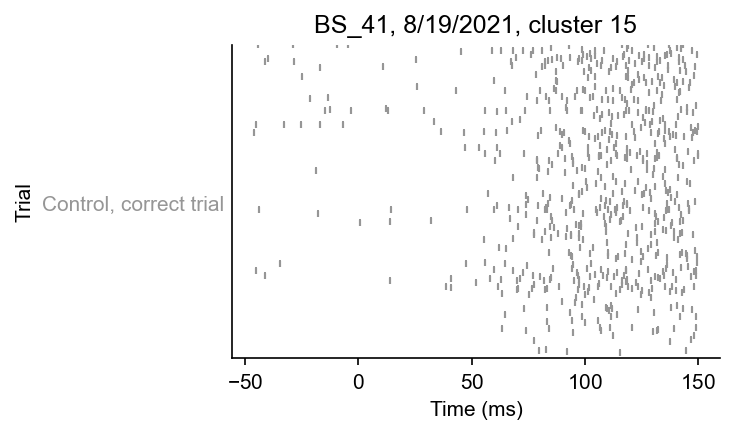

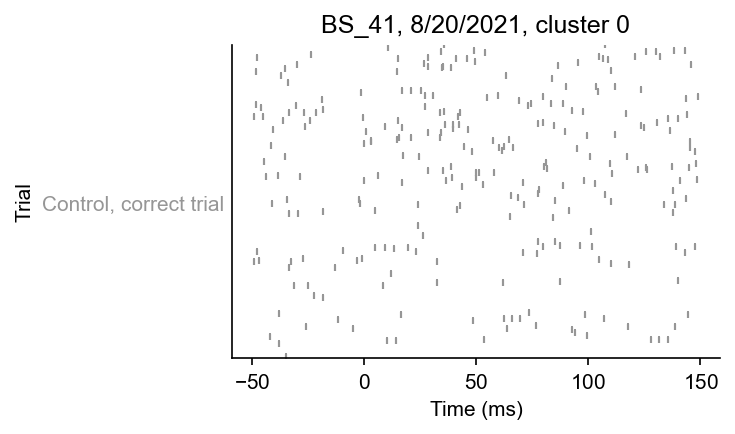

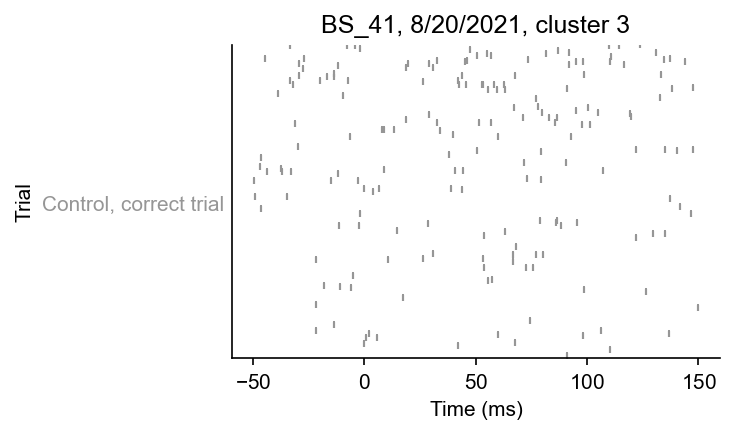

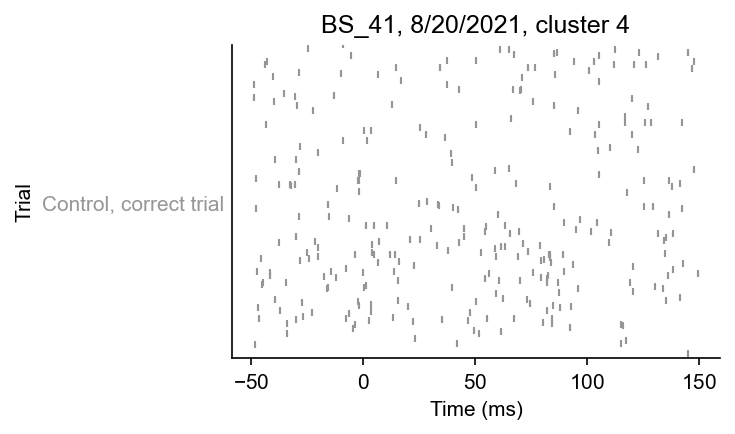

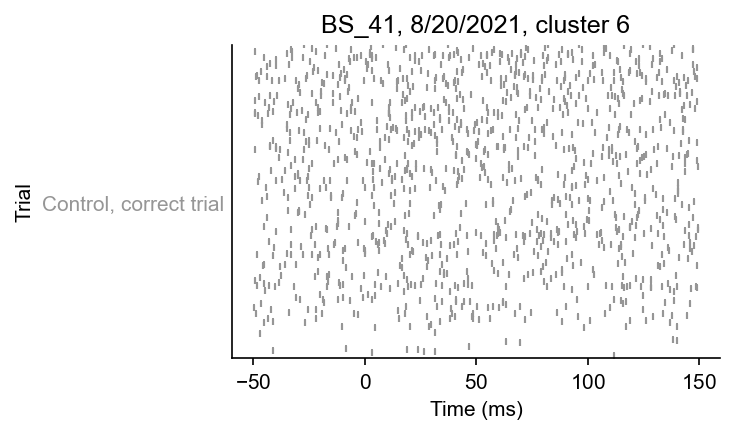

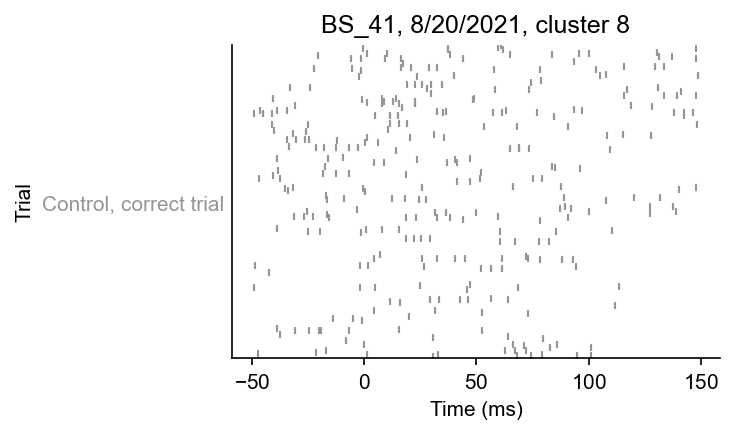

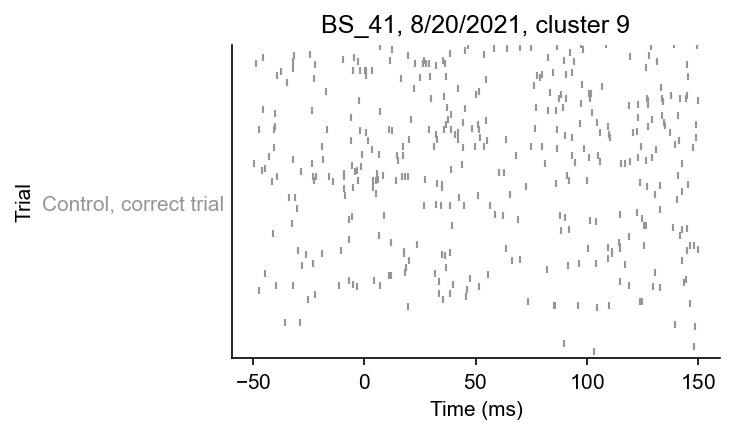

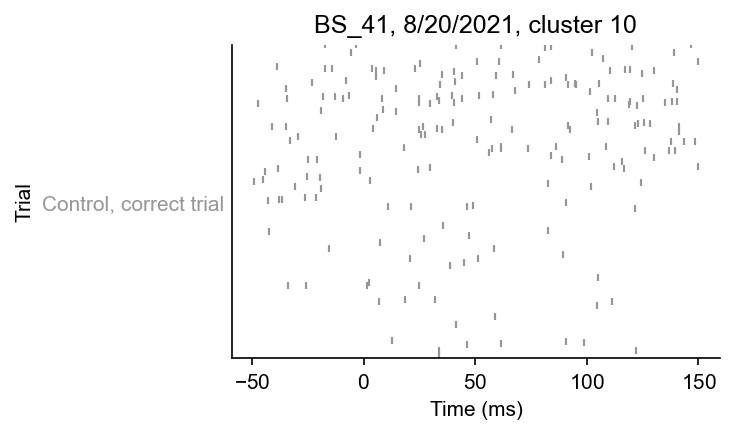

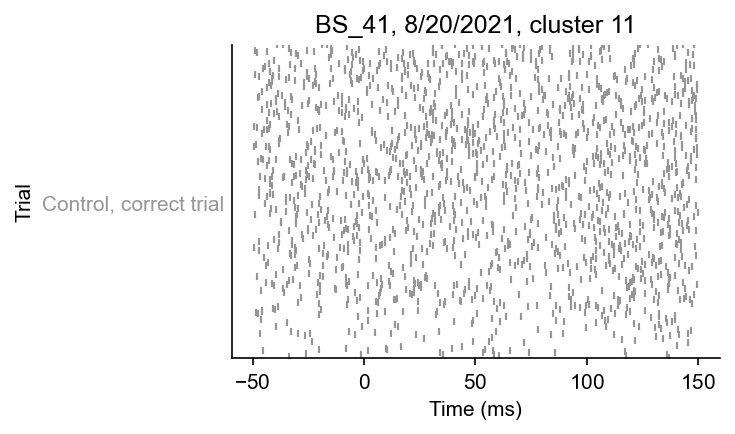

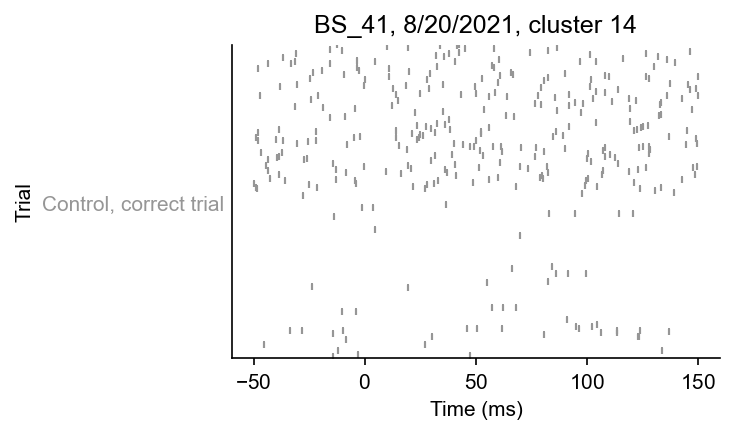

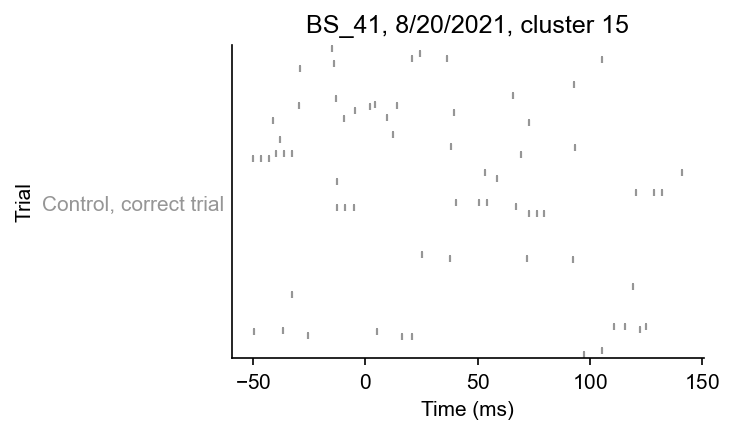

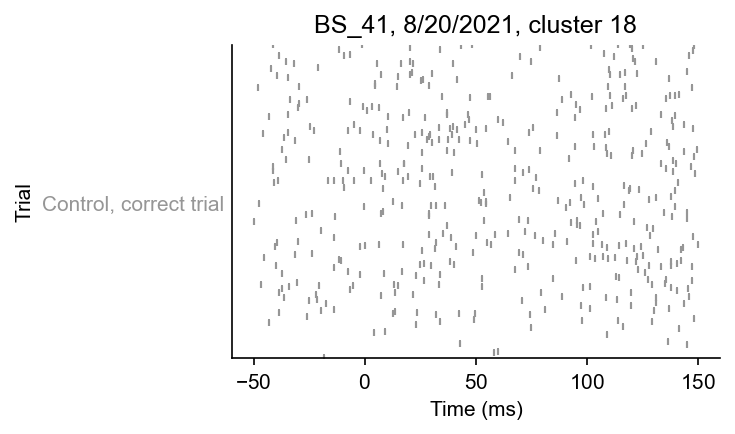

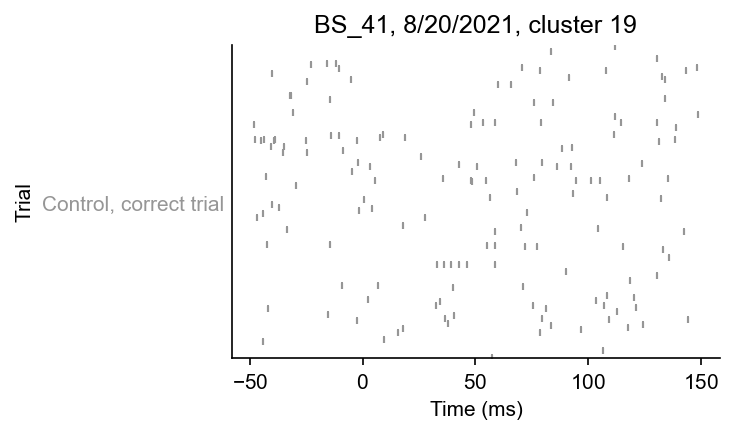

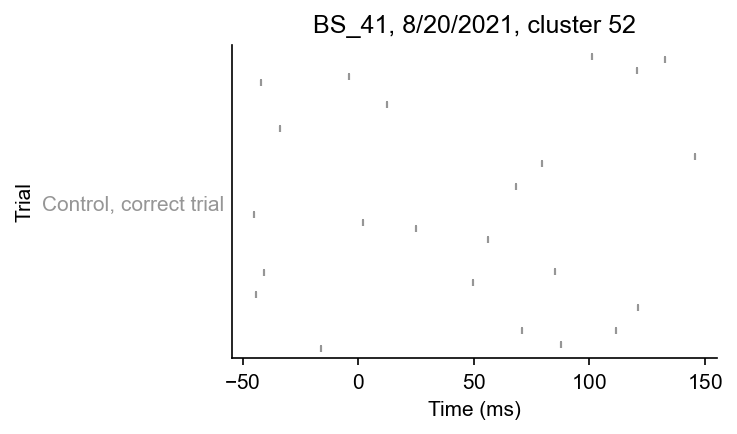

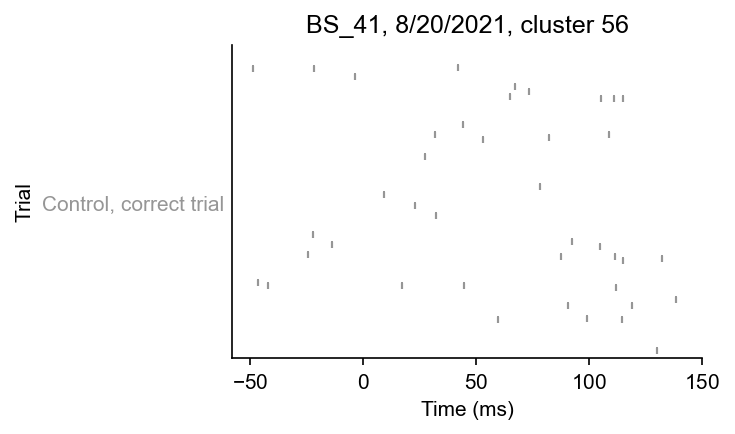

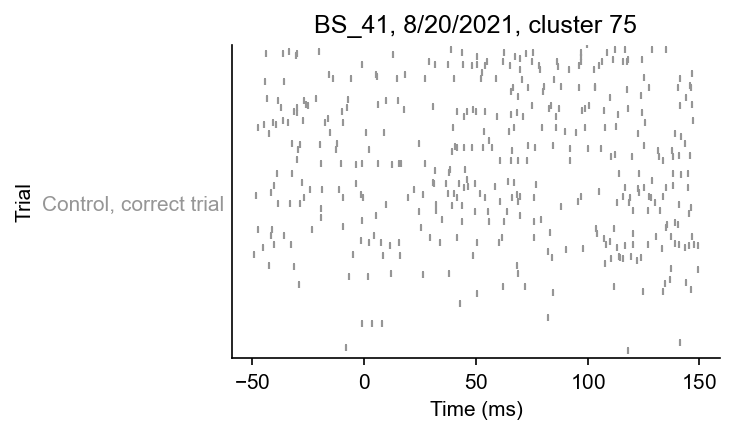

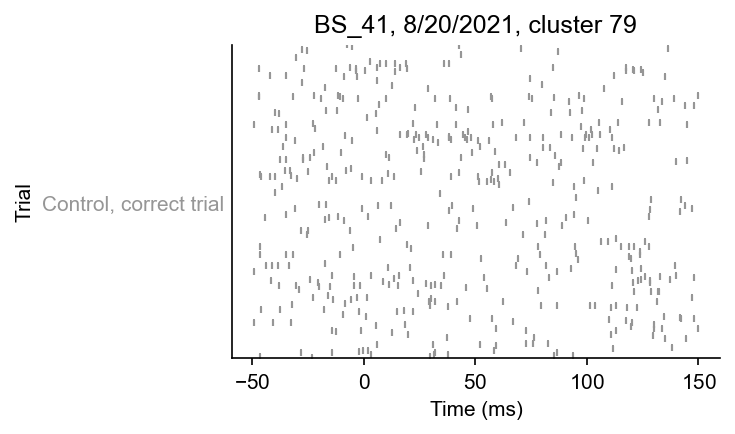

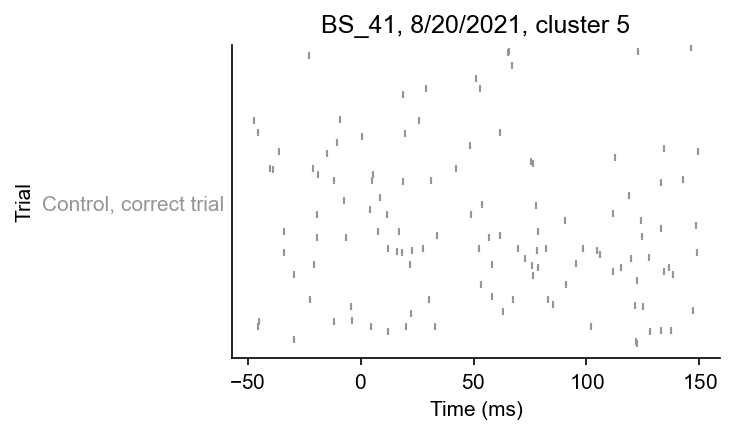

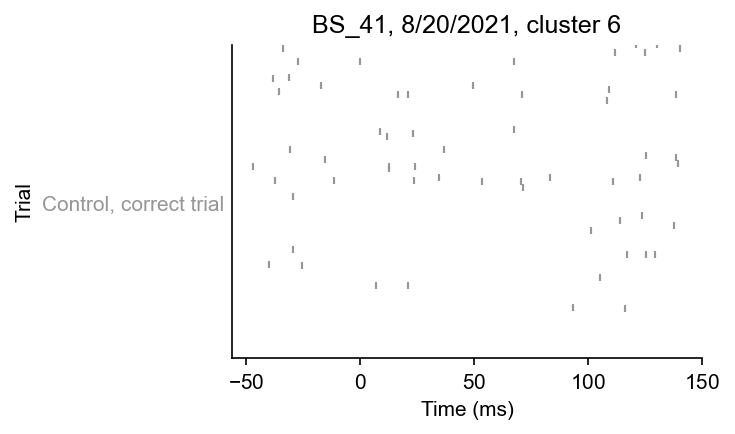

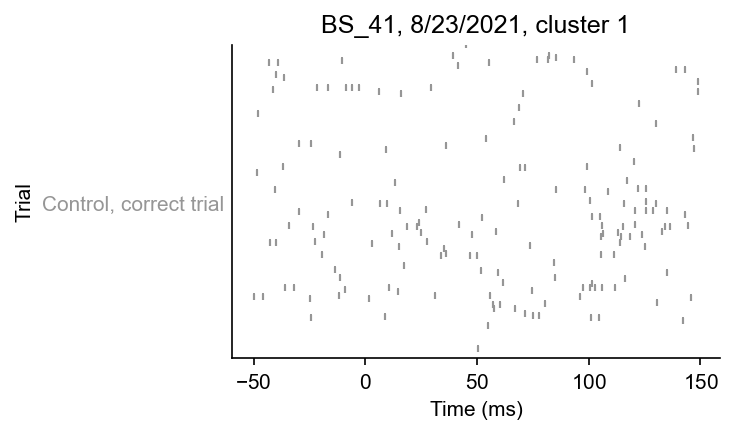

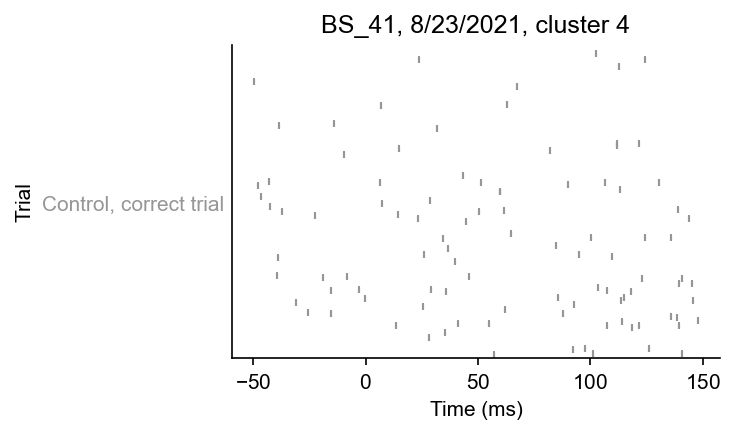

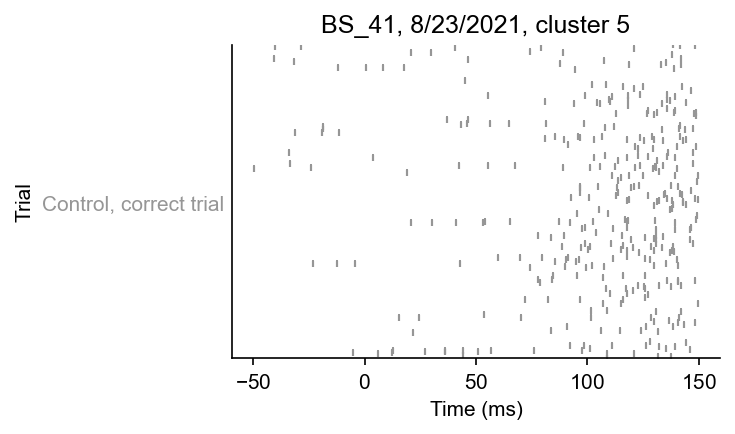

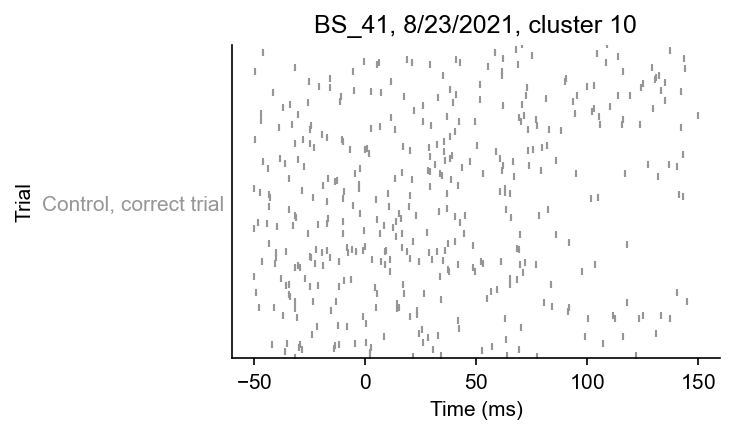

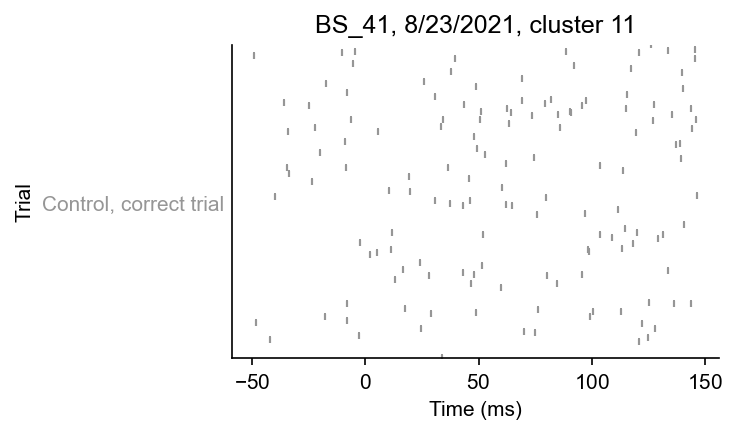

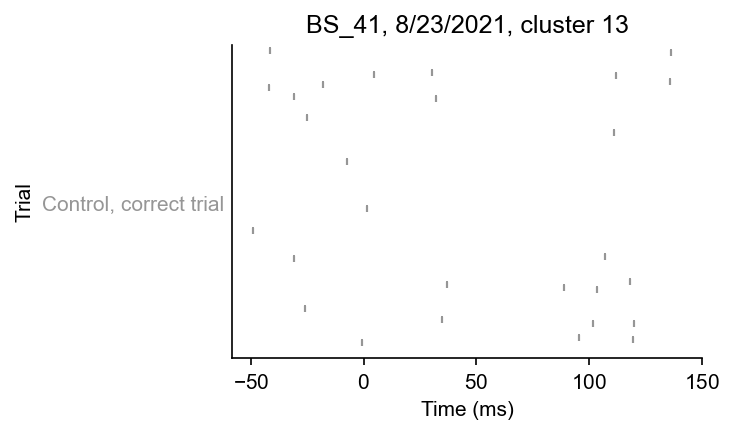

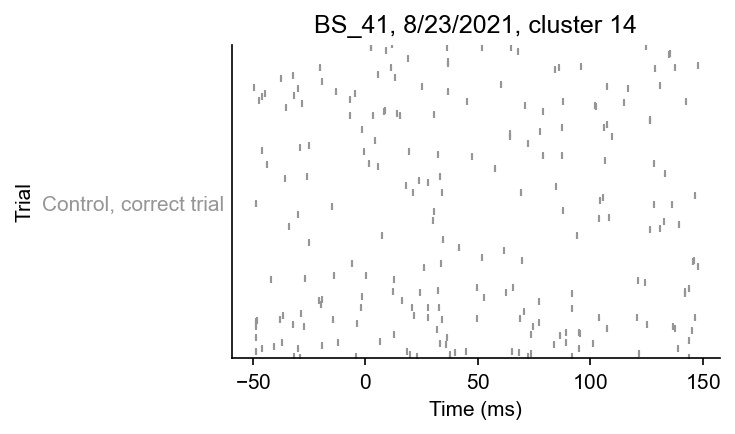

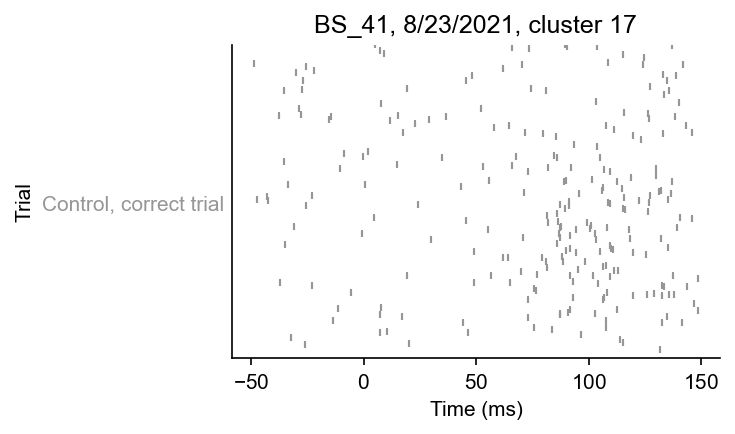

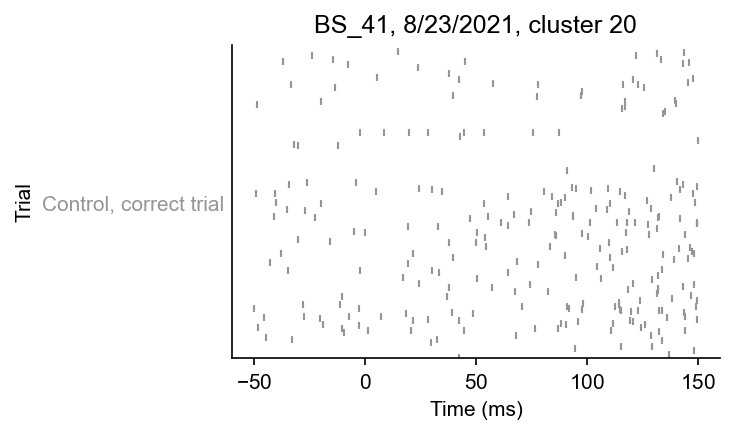

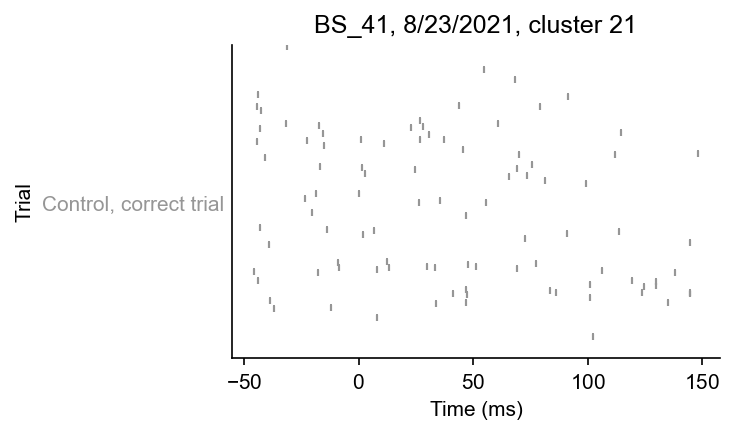

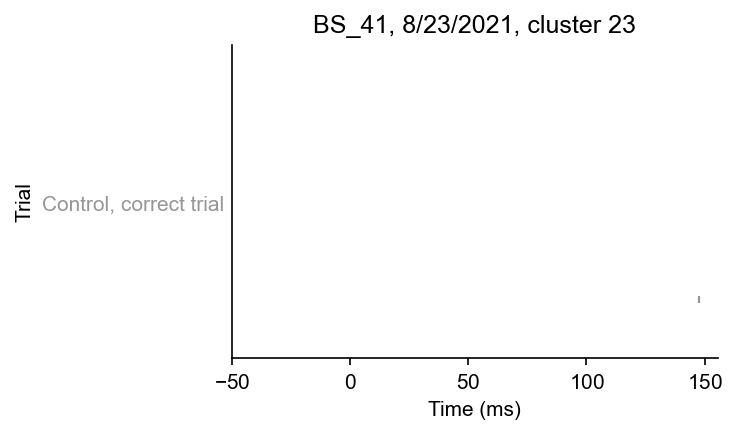

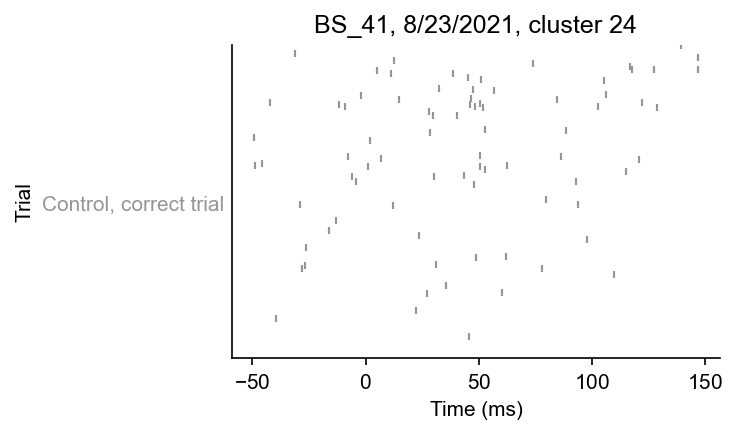

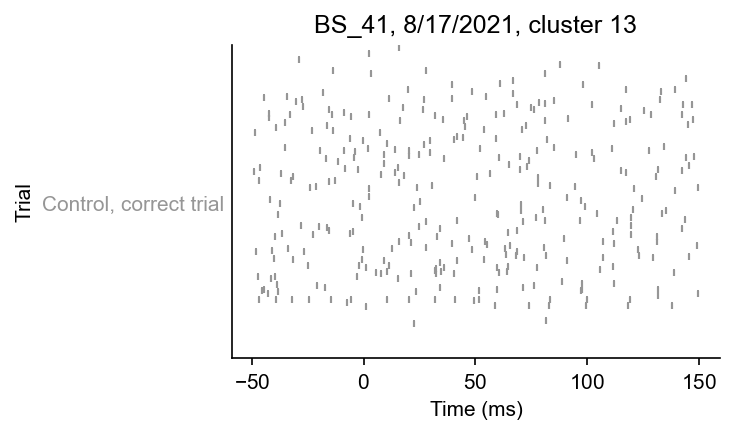

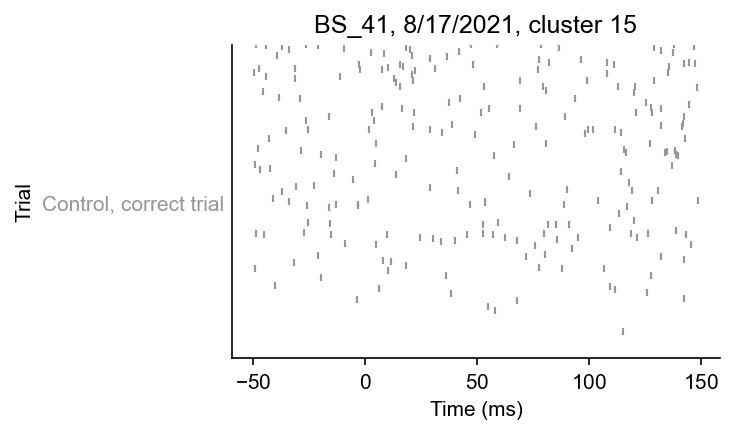

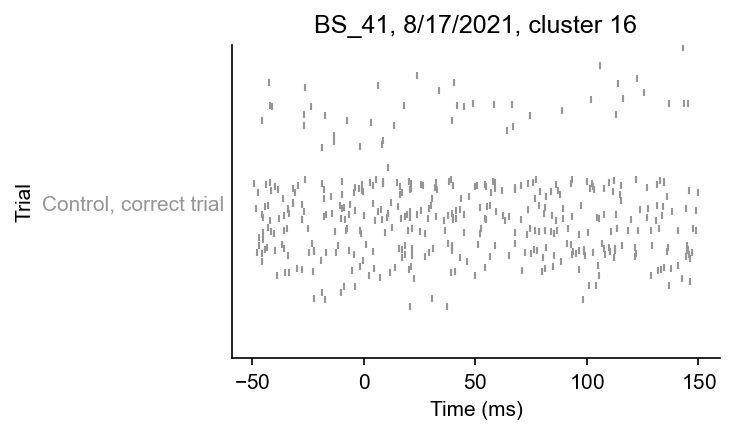

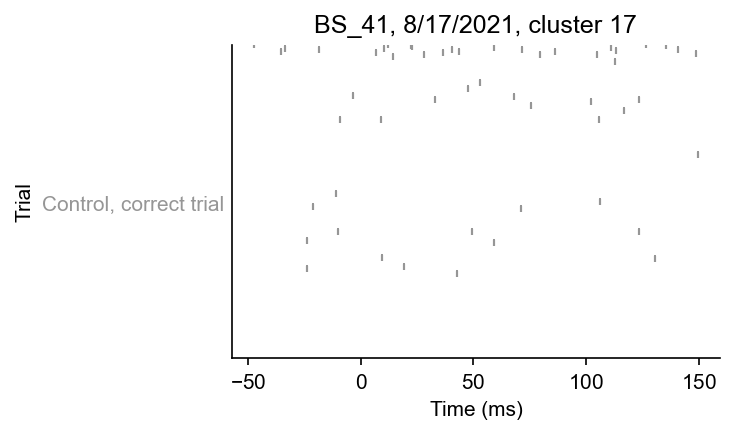

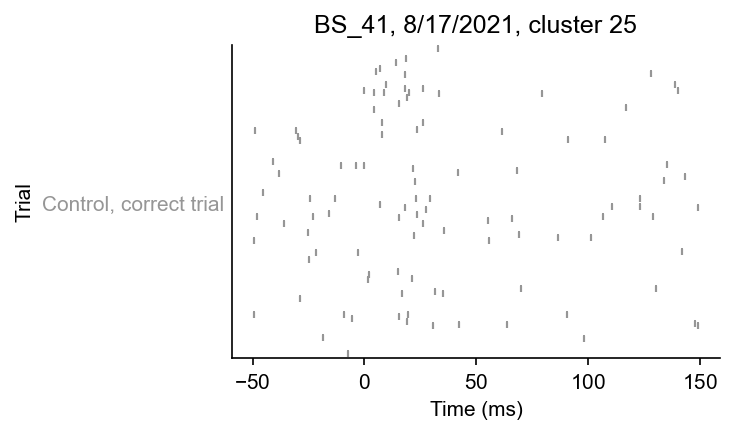

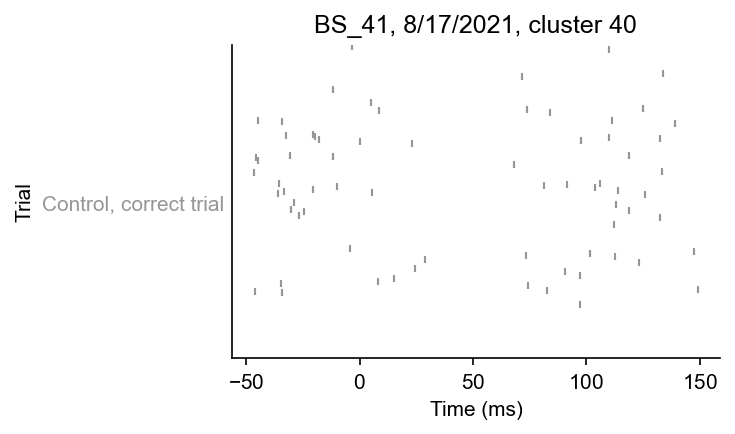

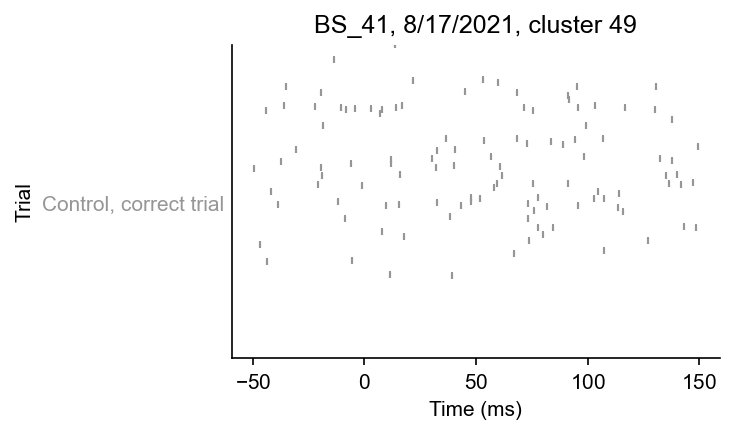

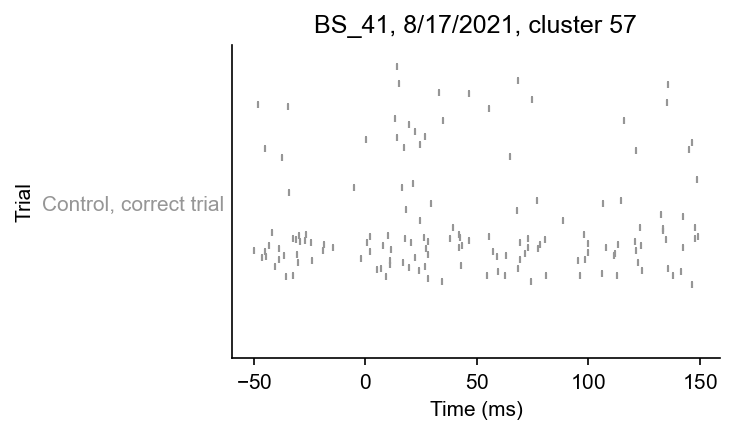

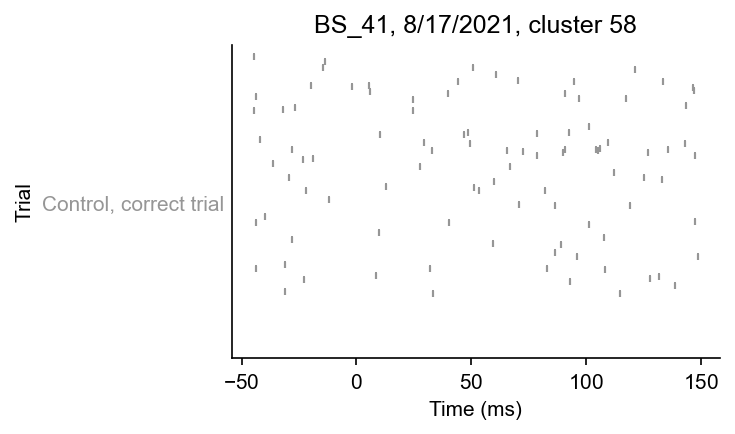

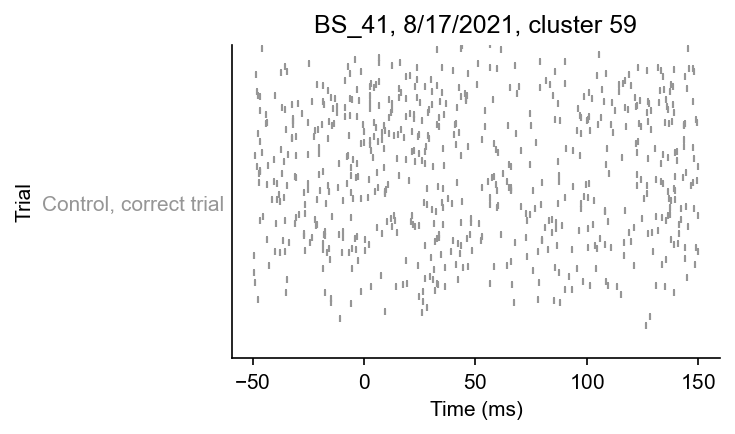

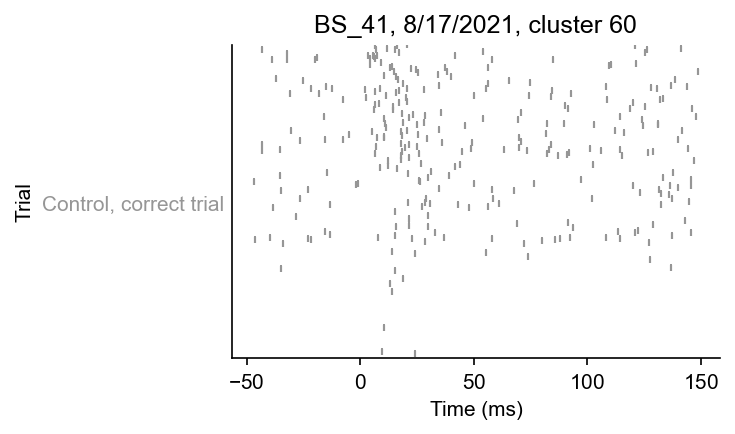

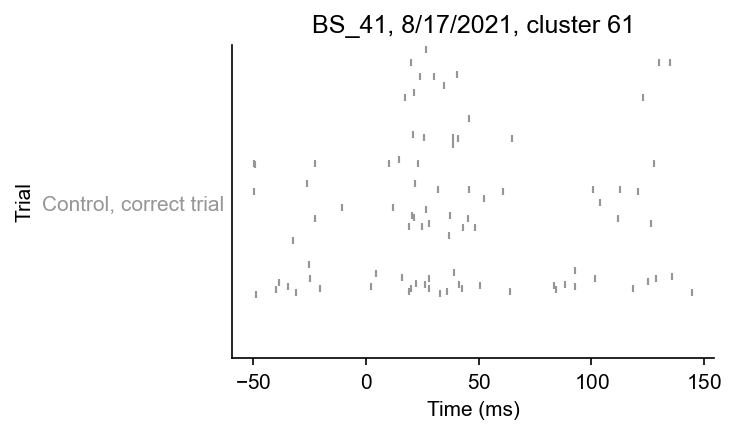

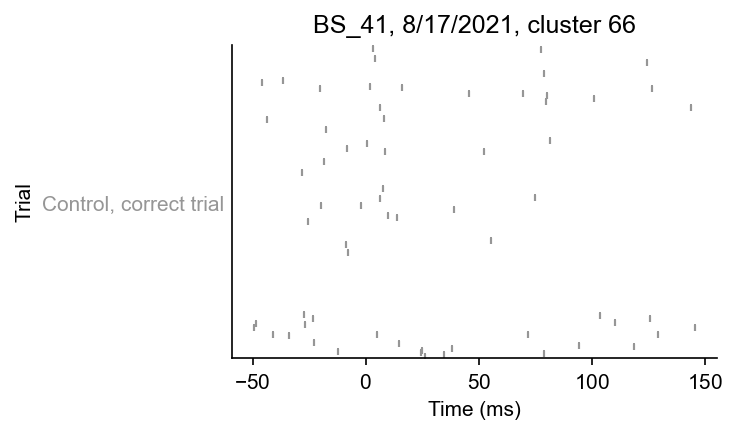

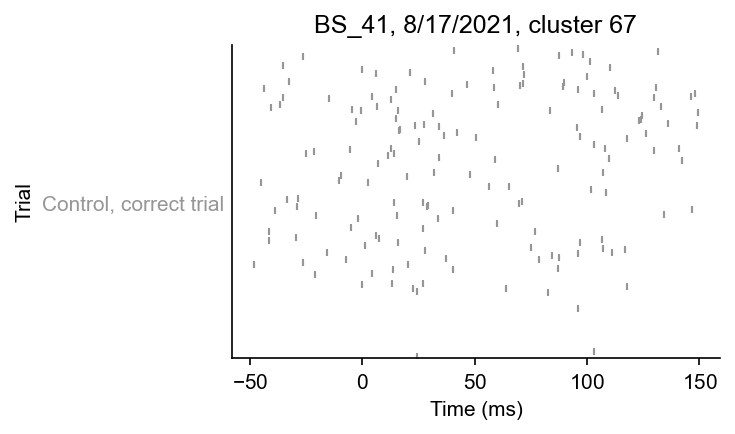

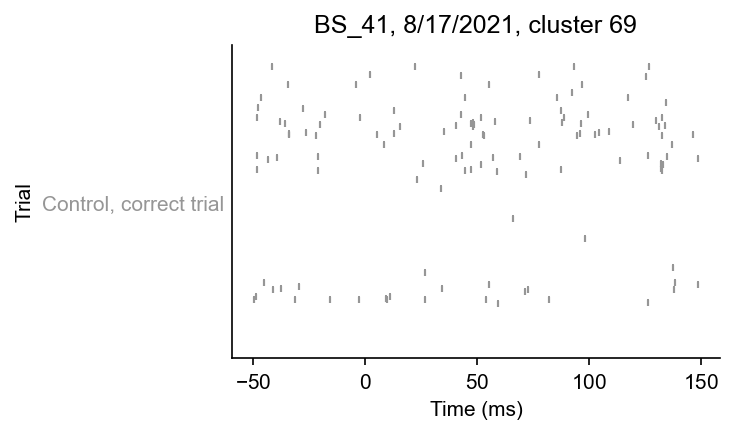

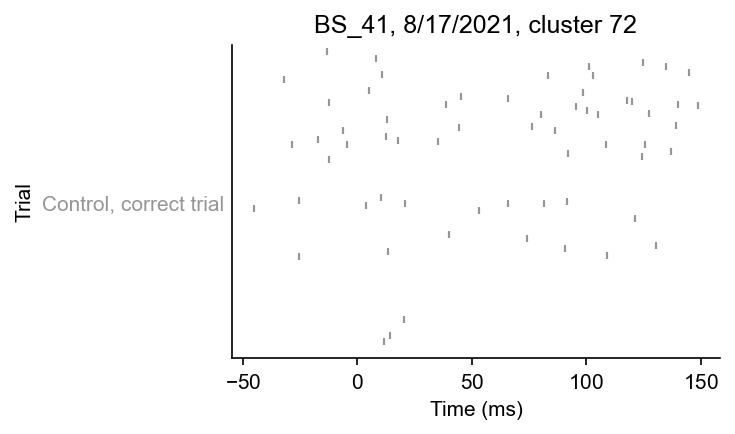

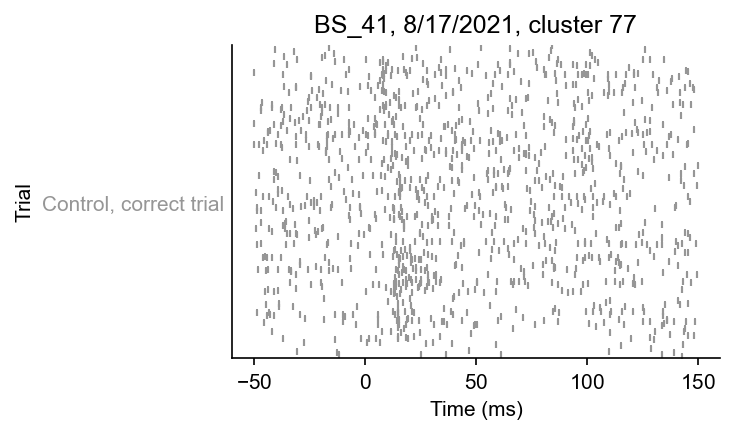

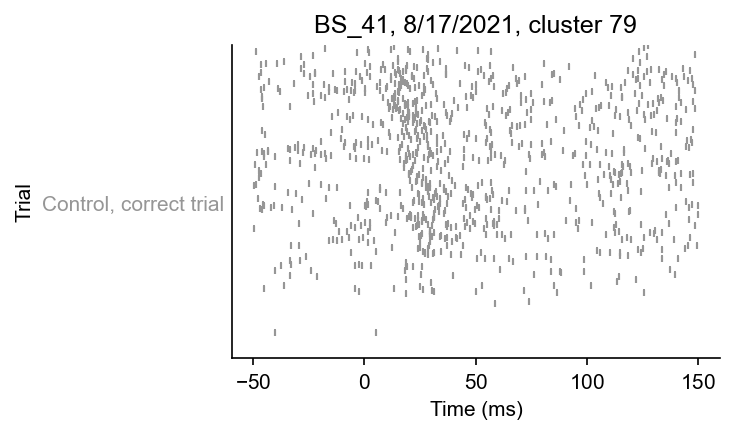

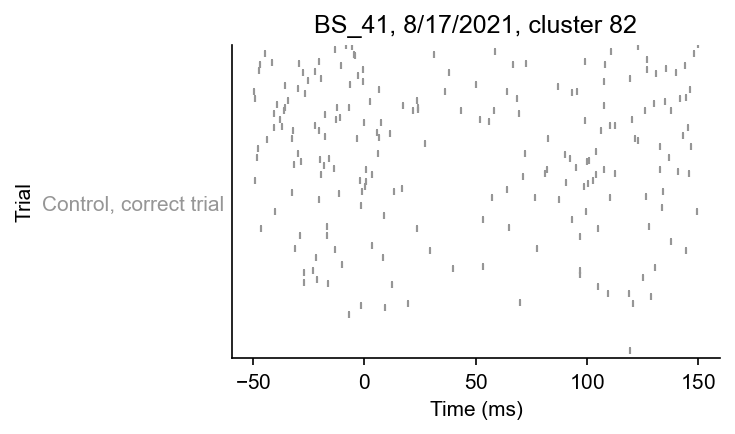

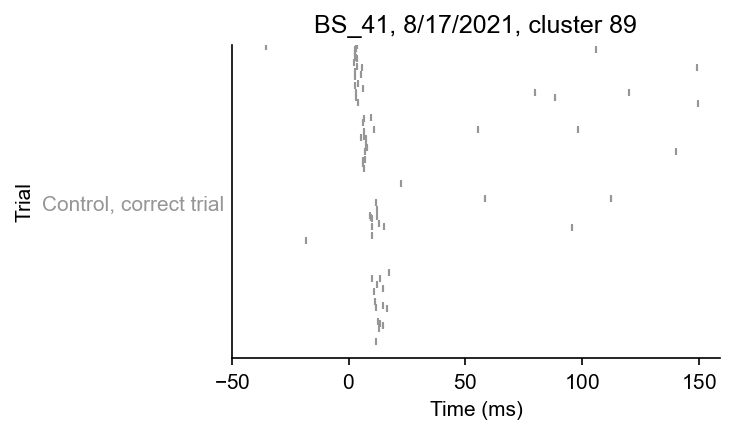

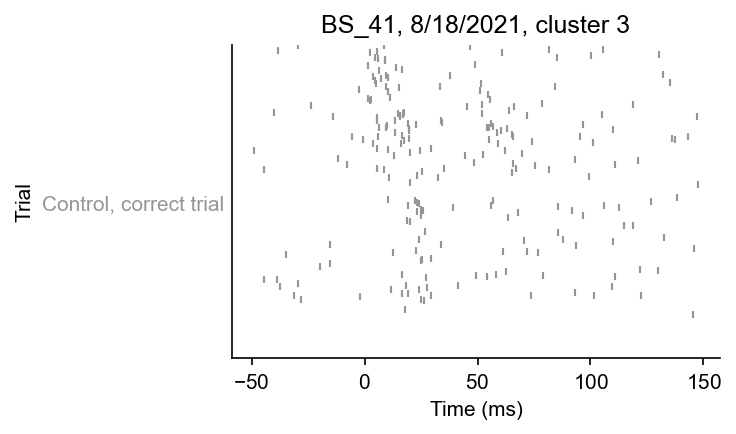

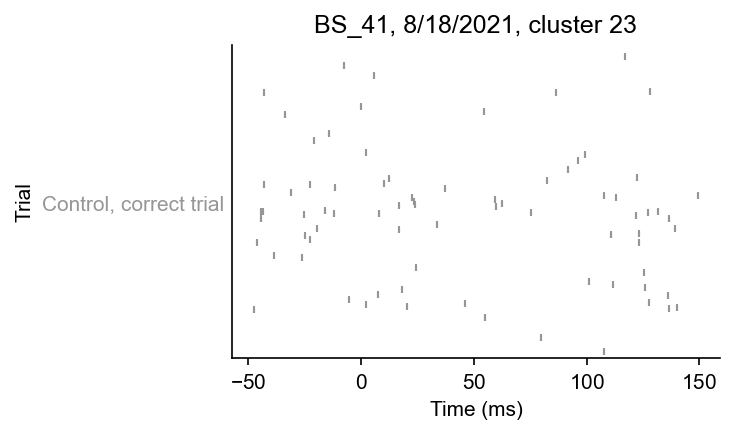

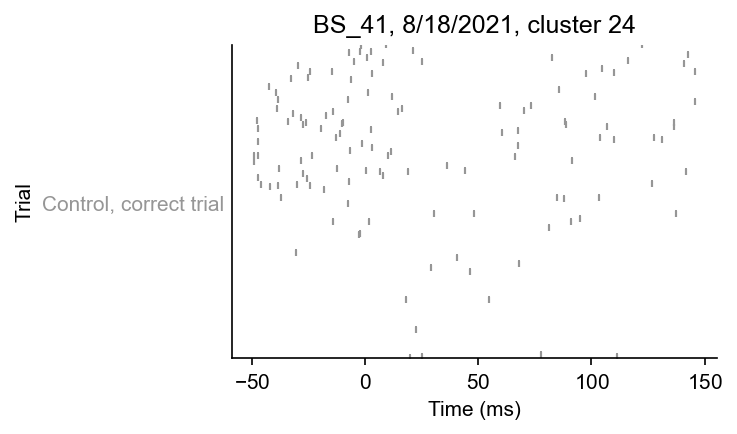

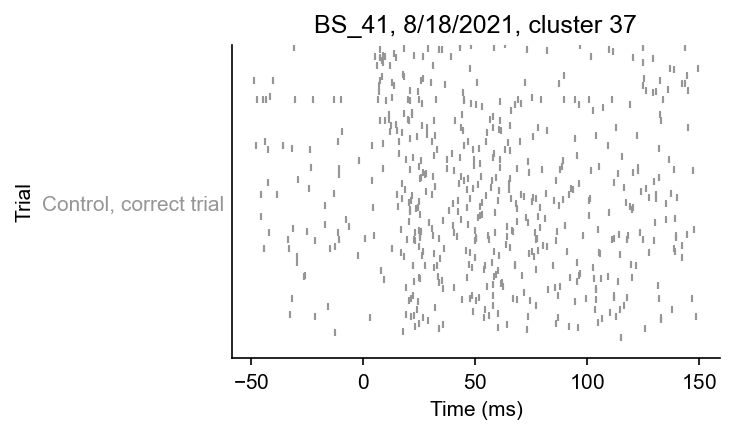

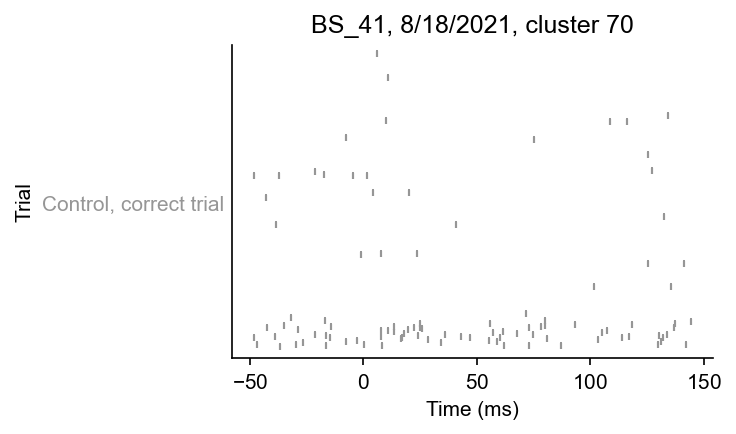

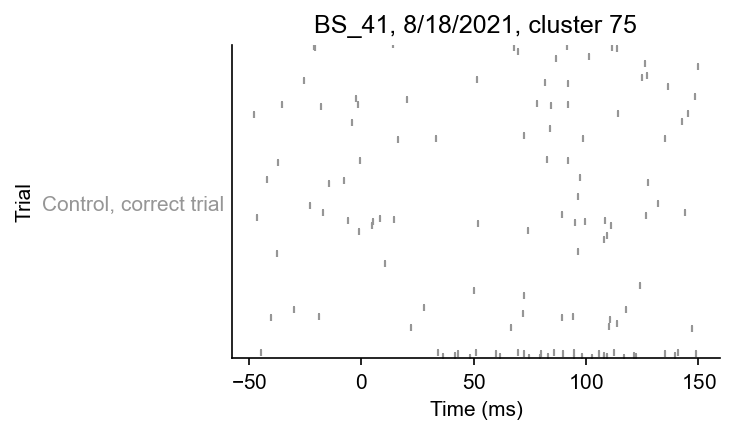

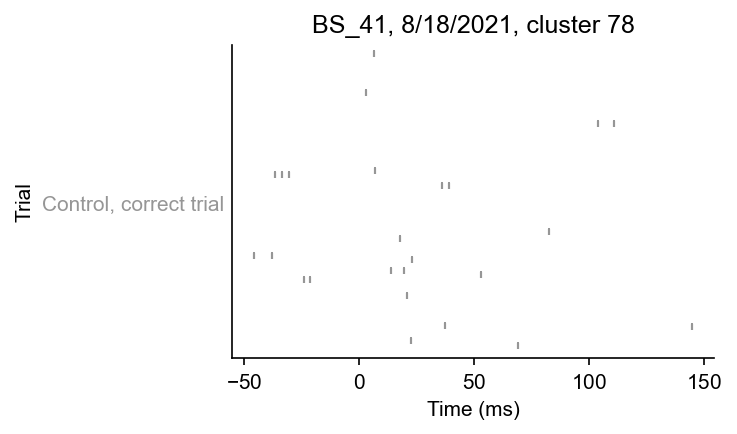

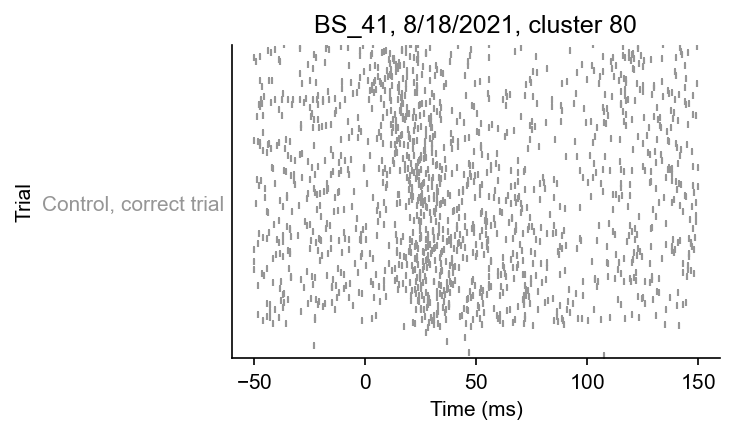

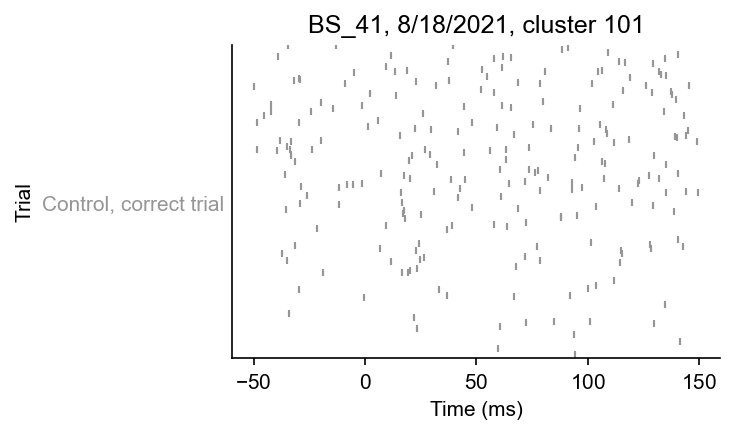

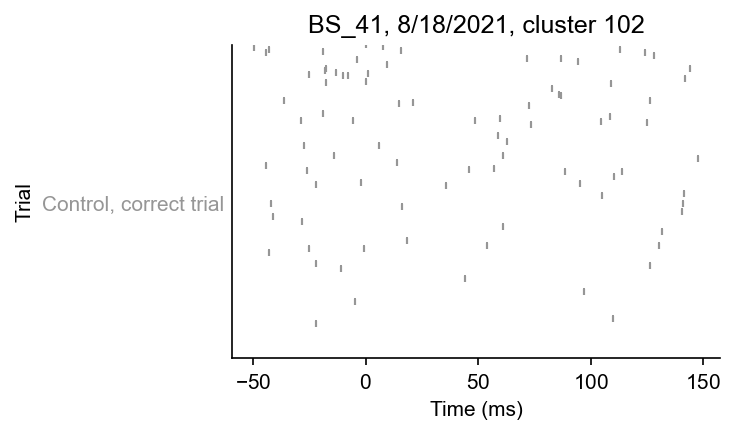

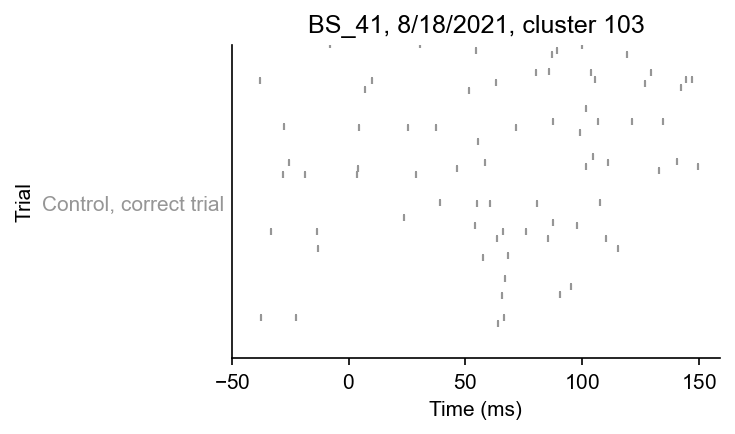

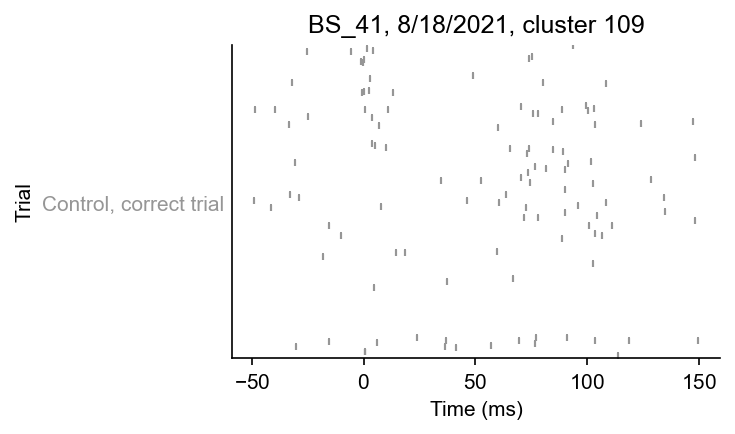

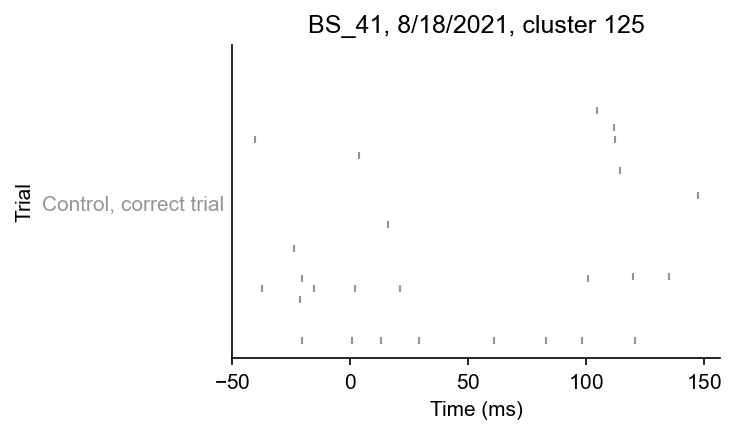

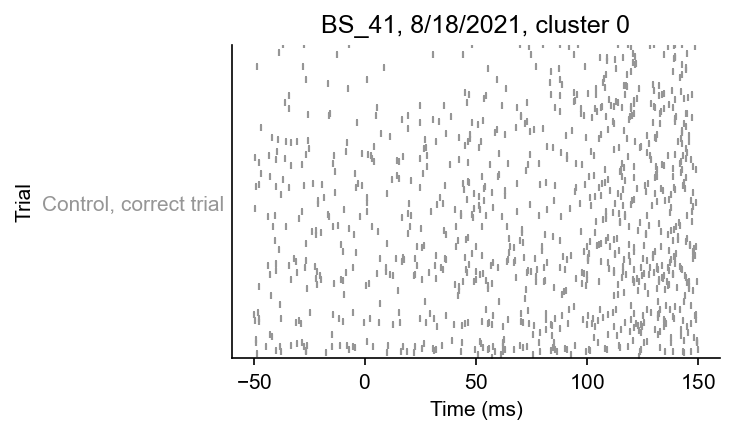

In [100]:
### SEPARATED BY GO/NOGO OR TARGET/NONTARGET

starttime = -0.05
endtime = 0.15
numbins = 100 + 1

height=10
width=1
trans=0.125
custommarker = mpl.path.Path([[-width,-height],[-width,height],[width,height],[width,-height]],closed=True)
    
    
# computing trials and plotting PSTHs for Opsin LASER ON trials
for session in tqdm(os.listdir(ops_directory)):
    
    try:
        sessionfile = ilep.loadSessionCached(ops_directory,session)
        
        if sessionfile.meta.task != 'opto switch':
            continue
            
        if not sessionfile.meta.animal in didnotlearnopsinanimals:
            continue
            
        if sessionfile.meta.animal != 'BS_123':
            continue

        if sessionfile.meta.cloudy:
            continue
            
        neurons = sessionfile.clusters.good
        
        for clust in neurons:
            title = str(sessionfile.meta.animal) + str(', ') + str(sessionfile.meta.date) + str(', cluster ') + str(clust)

        
            conditions = []     
            condition = SimpleNamespace()

            laser_on = sessionfile.trials.laser_stimulation
            correct = sessionfile.trials.correct
            laser_on = np.array(np.where(laser_on)[0])
            laser_on = laser_on[np.isin(laser_on,sessionfile.trim[10].trimmed_trials)]
            correct = np.array(np.where(correct)[0])
            correct = correct[np.isin(correct,sessionfile.trim[10].trimmed_trials)]
            laser_on_correct = np.intersect1d(laser_on, correct)      
            
            condition.trials = laser_on_correct
            condition.label = 'ON, correct trial'
            condition.color = LASER_COLOR
            conditions.append(condition)
            condition = SimpleNamespace()

            totaltrials = 0
            for cond in conditions:
                totaltrials += len(cond.trials)
            
            #Caching search -- Unit
            idx = np.equal(sessionfile.spikes.clusters,clust)
            totaltimes = sessionfile.spikes.times[idx]
            
            for cond in conditions:
                cond.timestoplot = []
                cond.trialstoplot = []
                
                for trialidx,trial in enumerate(cond.trials):
                    trialstart = sessionfile.trials.starts[trial]
                    
                    #Caching search -- Condition
                    idx = np.logical_and(      np.greater(totaltimes,trialstart+starttime*sessionfile.meta.fs) , np.less(totaltimes,trialstart+endtime*sessionfile.meta.fs)     )
                    times = totaltimes[idx]
                    
                    #Each spike time to plot
                    for spike in ((times-trialstart)/sessionfile.meta.fs*1000):
                        cond.timestoplot.append(spike)
                        cond.trialstoplot.append(trialidx+1)
                        
            #############################################---PLOTTING---#############################################     
            #plt.close('all')
            fig,ax = plt.subplots(figsize=(5,3))
            
            offset = 0
            tickmeans = []
            ticklabels = []
            numtrials = 0
            for cond in conditions:
                ax.scatter(cond.timestoplot,np.array(cond.trialstoplot)+offset,s=7.5,c=cond.color,marker=custommarker.vertices)
                
                if cond.label == 'ON, correct trial':
                    starttrial = offset
                    endtrial = offset+len(cond.trials)
                
                tickmeans.append(0.5*len(cond.trials)+offset)
                offset += len(cond.trials)
                ticklabels.append(cond.label)
                numtrials += len(cond.trials)
            ylims1 = [1,numtrials]
            ax.set_ylim(ylims1)
            ax.set_yticks(tickmeans)
            ax.set_yticklabels(ticklabels)       
            ax.tick_params(axis='y',length=0)
            colors = [cond.color for cond in conditions]
            [t.set_color(colors[idx]) for idx,t in enumerate(ax.yaxis.get_ticklabels())]
            ax.tick_params(axis='x',direction='out')
            ax.set_xticks([-50,0,50,100,150])    
            ax.set_ylabel('Trial')
            ax.set_xlabel('Time (ms)')
            ax.set_title(title)
            
            xlimsfromrasters = ax.get_xlim()
            
            plt.tight_layout()

    except Exception as e:
        print(e)
        pass
    
    
########################################################################################################################## 
# computing trials and plotting PSTHs for control laser OFF trials
for session in tqdm(os.listdir(act_directory)):
    #break
    try:
        sessionfile = ilep.loadSessionCached(act_directory,session)
        
        if sessionfile.meta.day_of_recording != sessionfile.meta.day_of_reversal:
            continue
            
        if not sessionfile.meta.animal in dualrecanimalnames:
            continue
        
        if not sessionfile.meta.animal == 'BS_41':
            continue
            
        
        ###### animal days to remove for various reasons
        if sessionfile.meta.animal == 'BS_49' and sessionfile.meta.day_of_training >= 19: # Drops below expert + other complications with data
            continue
        if sessionfile.meta.animal == 'BS_50' and sessionfile.meta.day_of_training >= 13: # Pre-reversal only
            continue
        if sessionfile.meta.animal == 'BS_51' and sessionfile.meta.day_of_training >= 22: # Drops below expert
            continue
        if sessionfile.meta.animal == 'BS_56' and sessionfile.meta.day_of_training >= 22:  # Drops below expert
            continue
        if sessionfile.meta.animal == 'BS_67' and sessionfile.meta.day_of_training >= 15: # Drops below expert
            continue
        ######
            
        neurons = sessionfile.clusters.good
        
        for clust in neurons:
            title = str(sessionfile.meta.animal) + str(', ') + str(sessionfile.meta.date) + str(', cluster ') + str(clust)

        
            conditions = []     
            condition = SimpleNamespace()
            
            laser_off_correct =  np.where(sessionfile.trials.correct)[0]    
            
            condition.trials = laser_off_correct
            condition.label = 'Control, correct trial'
            condition.color = GOOD_GREY
            conditions.append(condition)
            condition = SimpleNamespace()

            totaltrials = 0
            for cond in conditions:
                totaltrials += len(cond.trials)
            
            #Caching search -- Unit
            idx = np.equal(sessionfile.spikes.clusters,clust)
            totaltimes = sessionfile.spikes.times[idx]
            
            for cond in conditions:
                cond.timestoplot = []
                cond.trialstoplot = []
                
                for trialidx,trial in enumerate(cond.trials):
                    trialstart = sessionfile.trials.starts[trial]
                    
                    #Caching search -- Condition
                    idx = np.logical_and(      np.greater(totaltimes,trialstart+starttime*sessionfile.meta.fs) , np.less(totaltimes,trialstart+endtime*sessionfile.meta.fs)     )
                    times = totaltimes[idx]
                    
                    #Each spike time to plot
                    for spike in ((times-trialstart)/sessionfile.meta.fs*1000):
                        cond.timestoplot.append(spike)
                        cond.trialstoplot.append(trialidx+1)
                        
            #############################################---PLOTTING---#############################################     
            #plt.close('all')
            fig,ax = plt.subplots(figsize=(5,3))
            
            
            offset = 0
            tickmeans = []
            ticklabels = []
            numtrials = 0
            for cond in conditions:
                ax.scatter(cond.timestoplot,np.array(cond.trialstoplot)+offset,s=7.5,c=cond.color,marker=custommarker.vertices)
                
                if cond.label == 'Control, correct trial':
                    starttrial = offset
                    endtrial = offset+len(cond.trials)
                
                tickmeans.append(0.5*len(cond.trials)+offset)
                offset += len(cond.trials)
                ticklabels.append(cond.label)
                numtrials += len(cond.trials)
            ylims1 = [1,numtrials]
            ax.set_ylim(ylims1)
            ax.set_yticks(tickmeans)
            ax.set_yticklabels(ticklabels)       
            ax.tick_params(axis='y',length=0)
            colors = [cond.color for cond in conditions]
            [t.set_color(colors[idx]) for idx,t in enumerate(ax.yaxis.get_ticklabels())]
            ax.tick_params(axis='x',direction='out')
            ax.set_xticks([-50,0,50,100,150])    
            ax.set_ylabel('Trial')
            ax.set_xlabel('Time (ms)')
            ax.set_title(title)
            
            xlimsfromrasters = ax.get_xlim()
            
            plt.tight_layout()

    except Exception as e:
        print(e)
        pass

100%|██████████| 533/533 [00:05<00:00, 90.14it/s] 


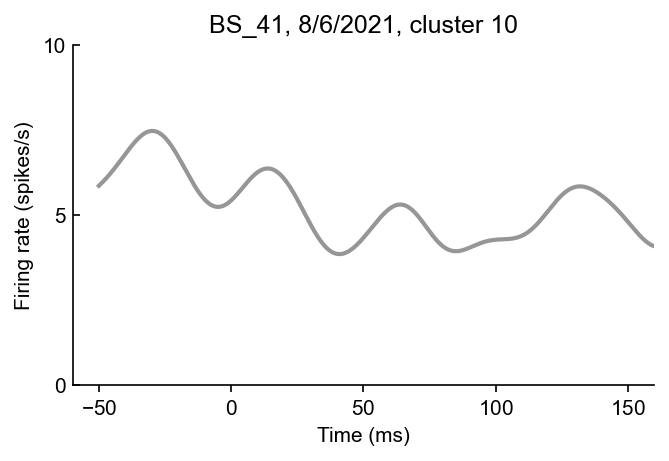

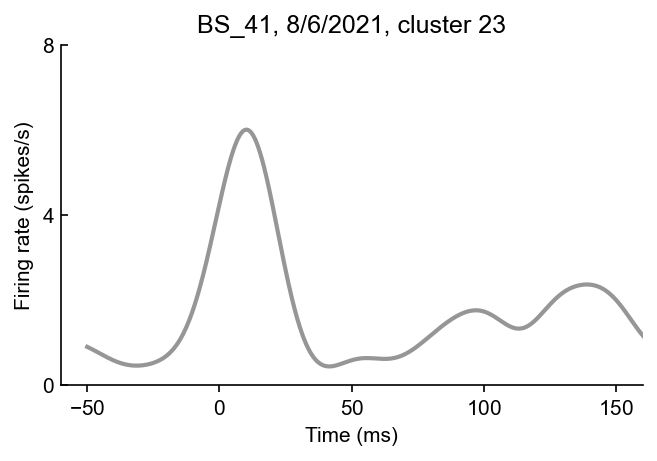

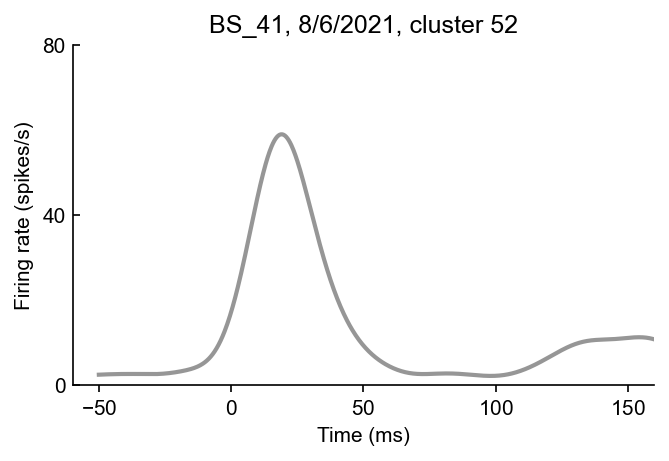

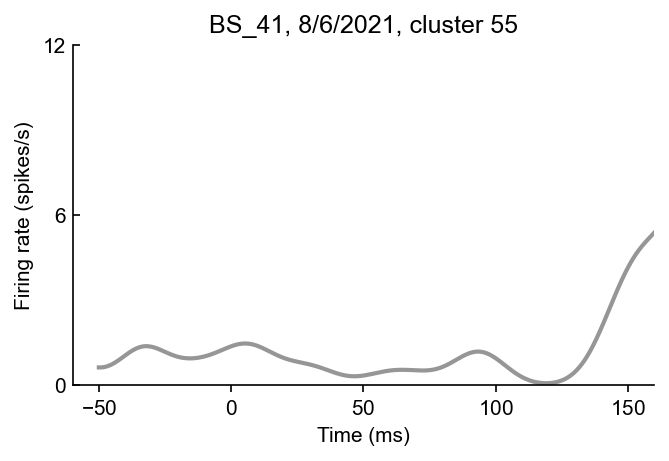

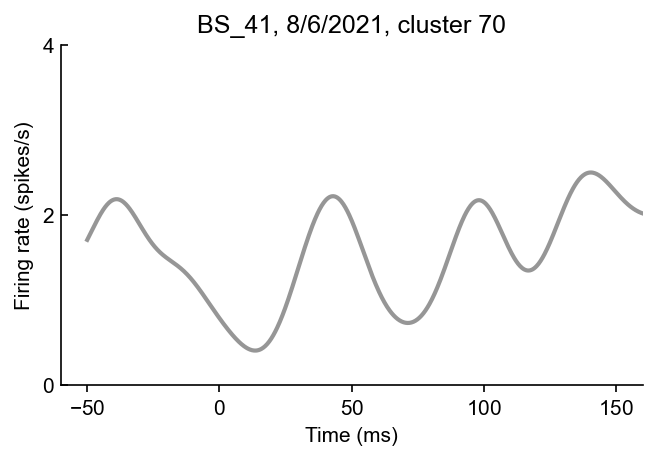

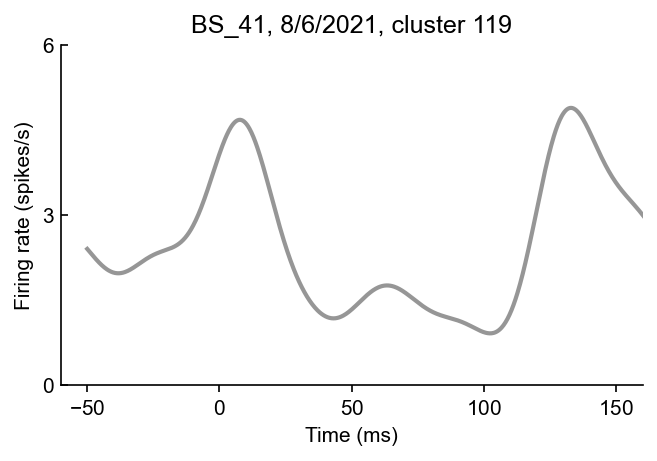

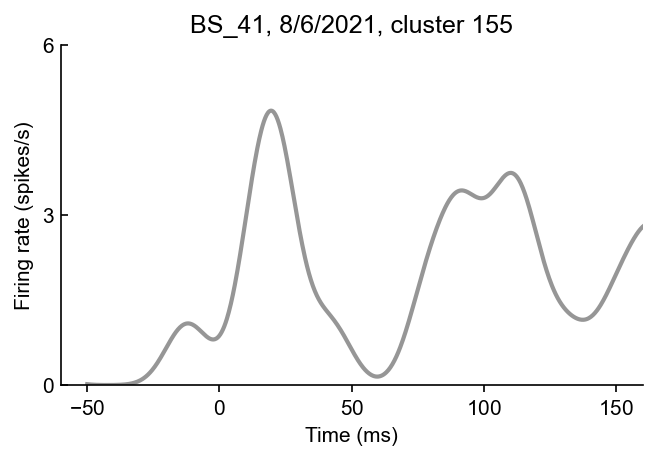

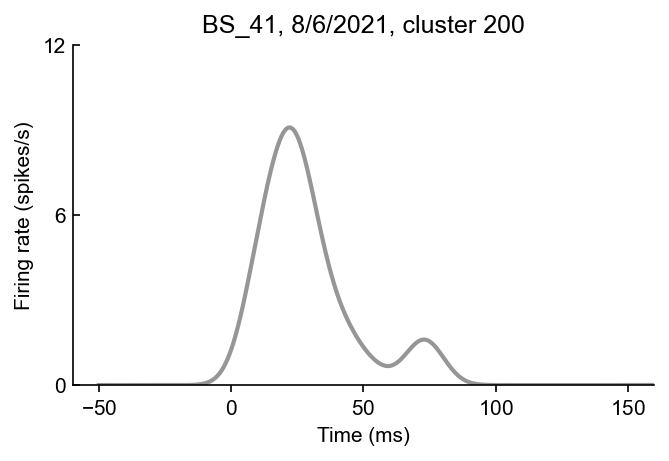

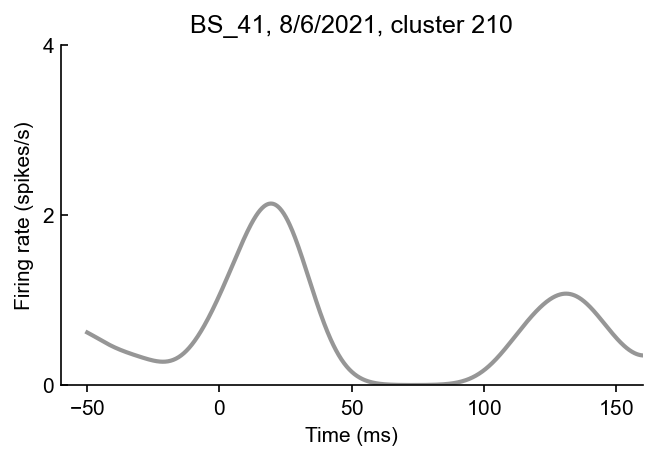

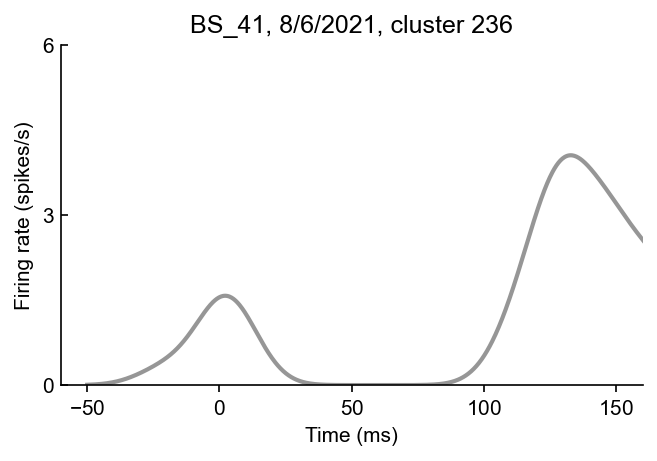

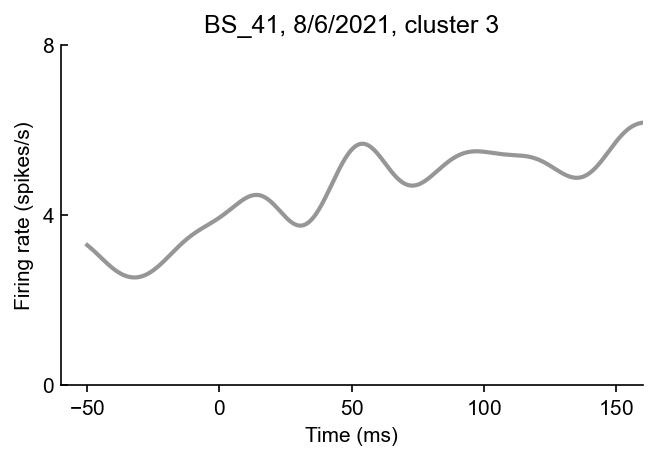

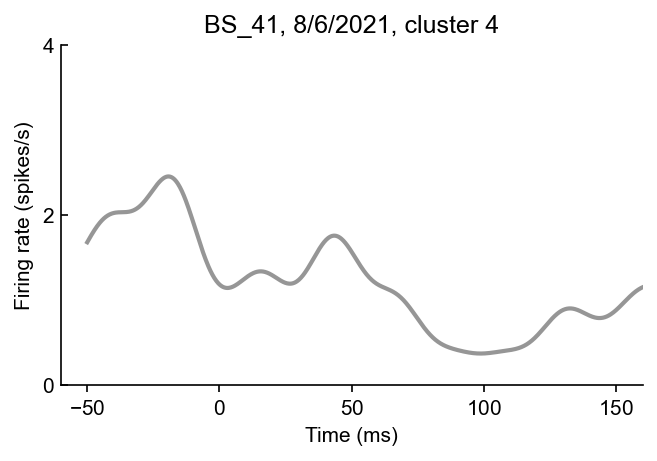

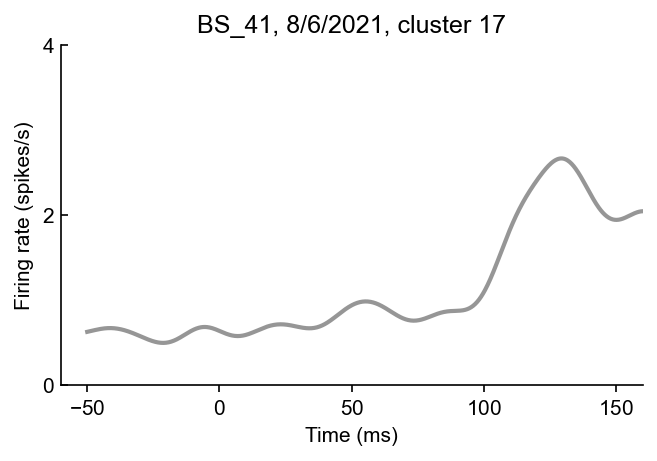

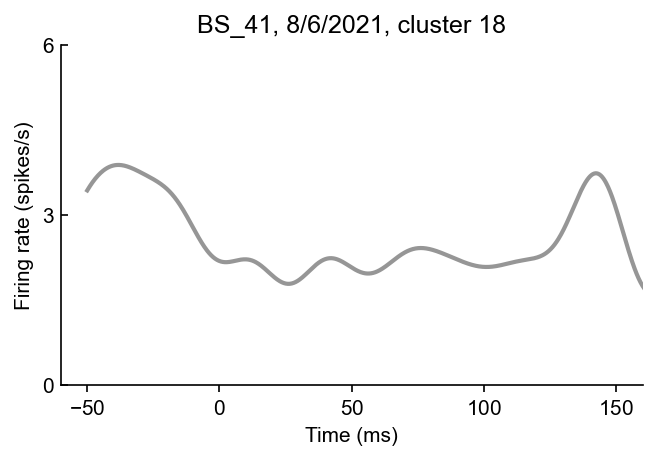

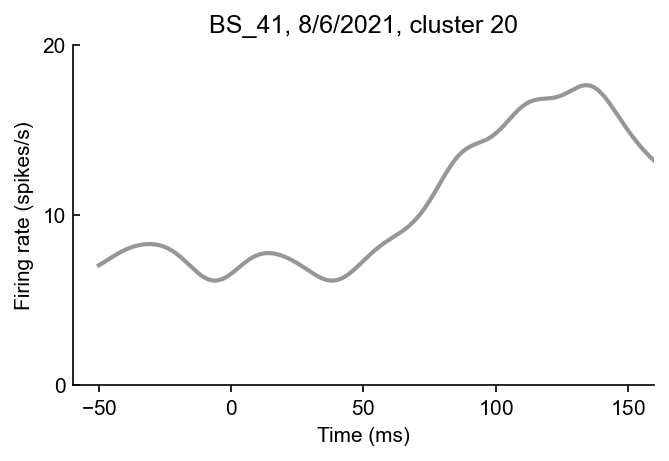

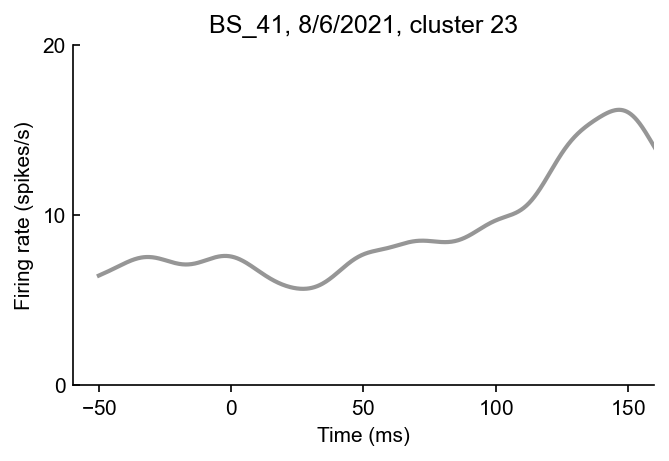

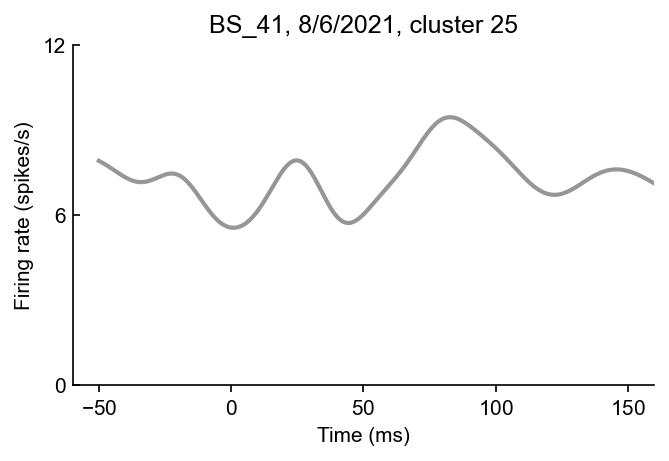

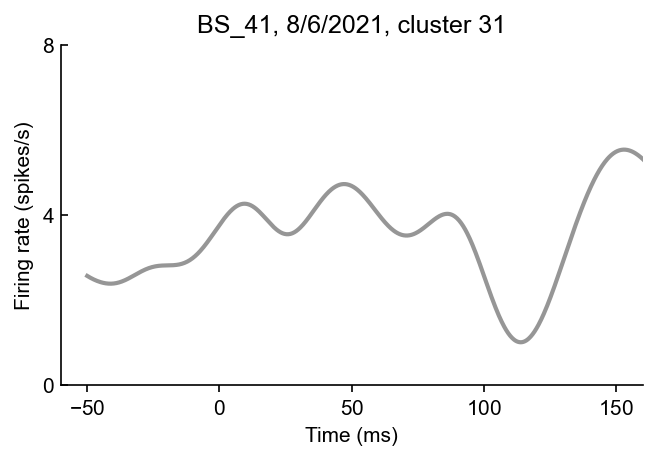

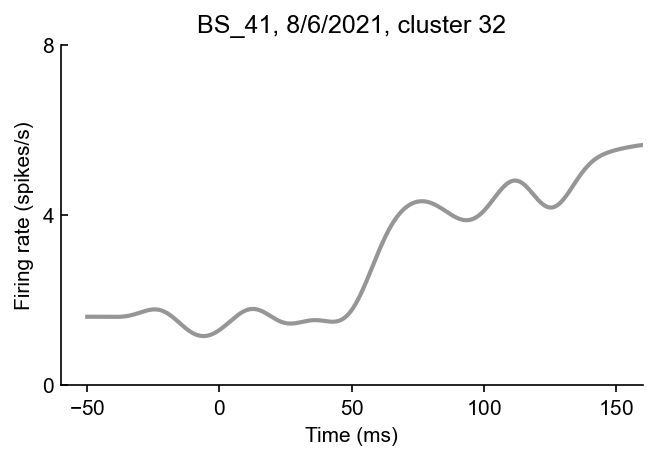

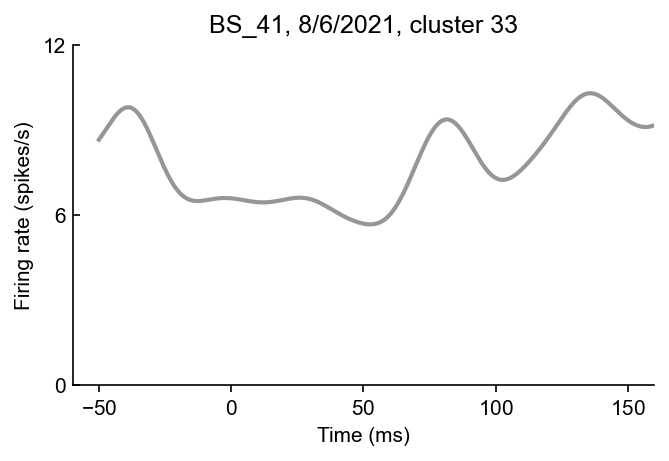

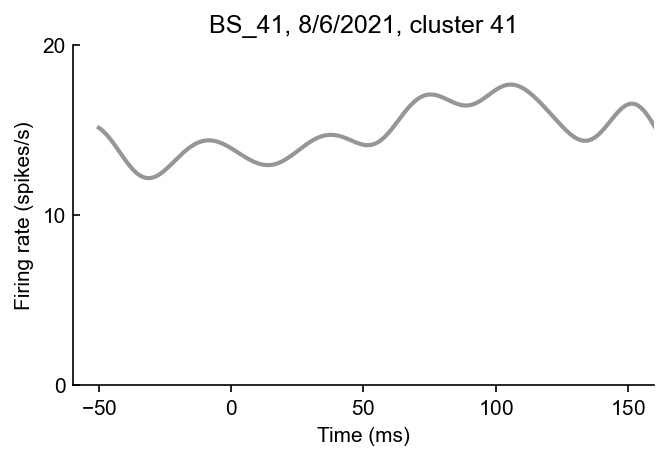

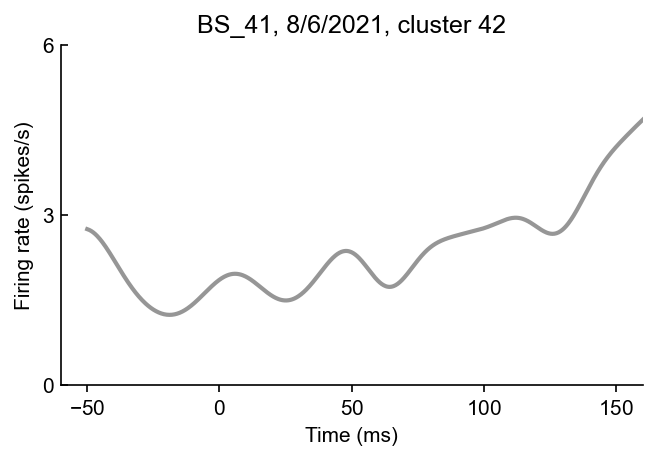

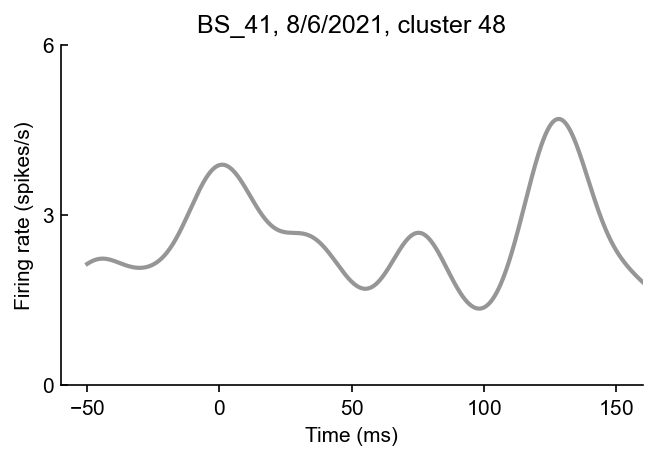

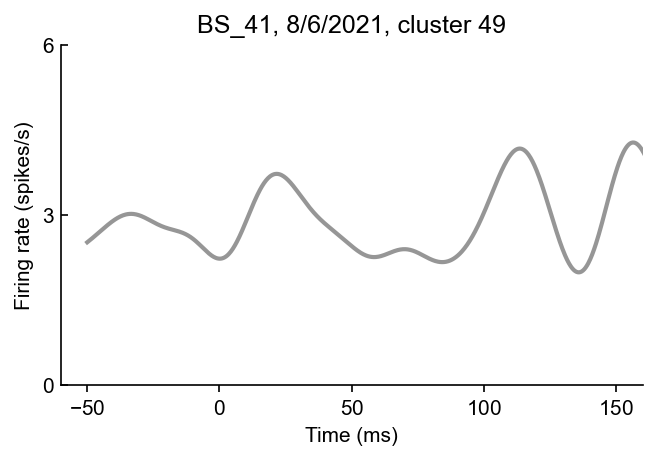

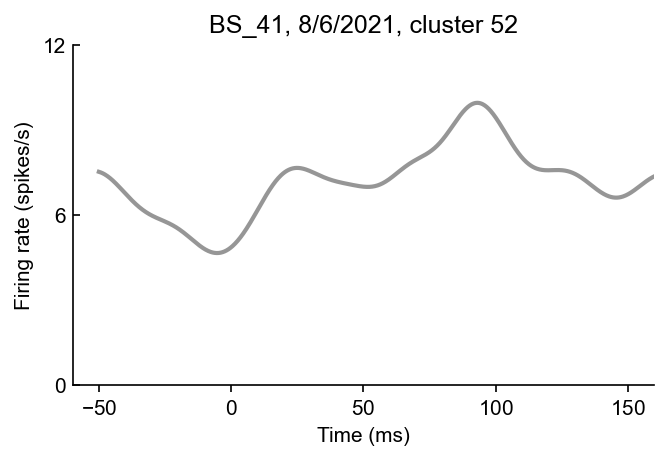

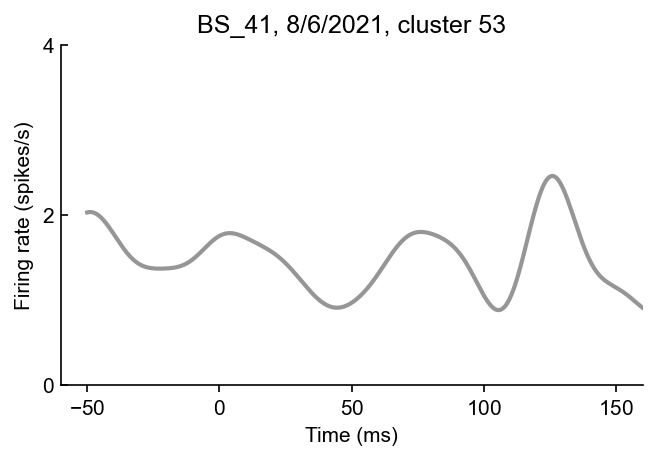

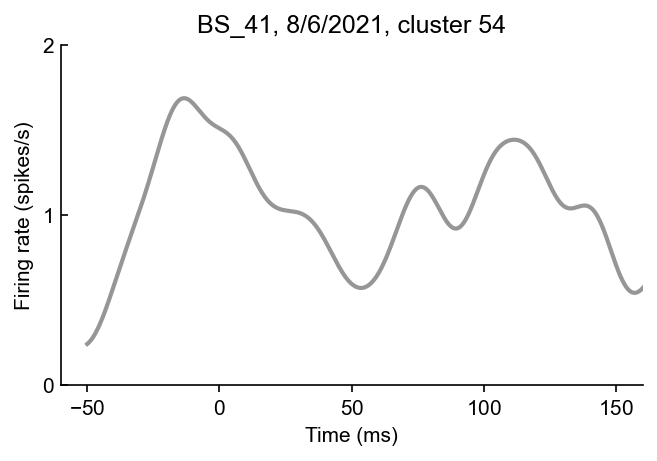

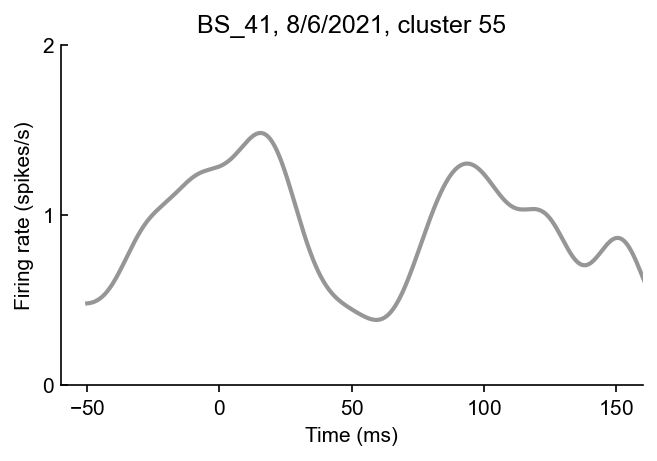

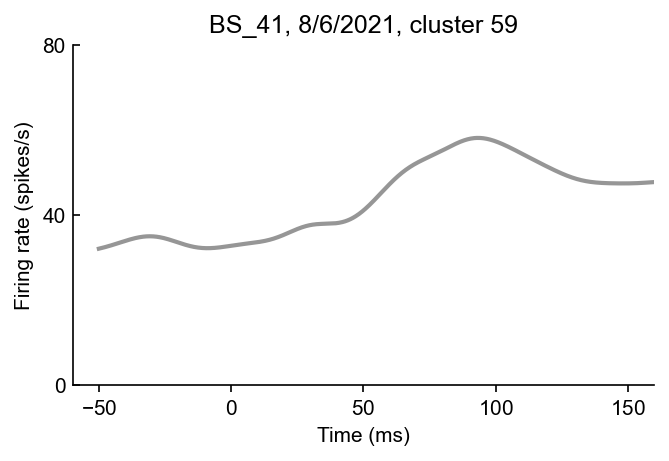

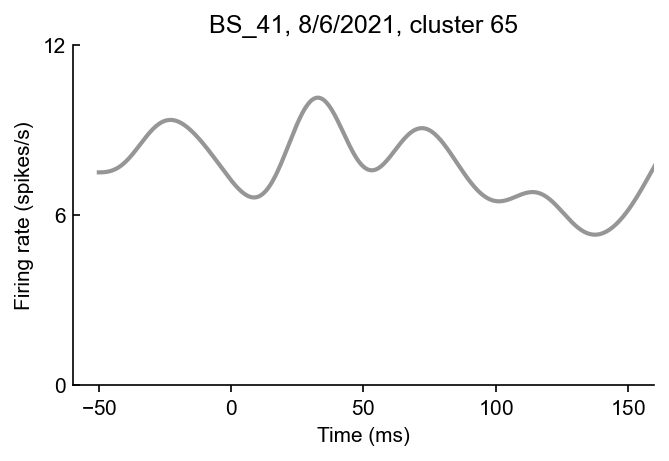

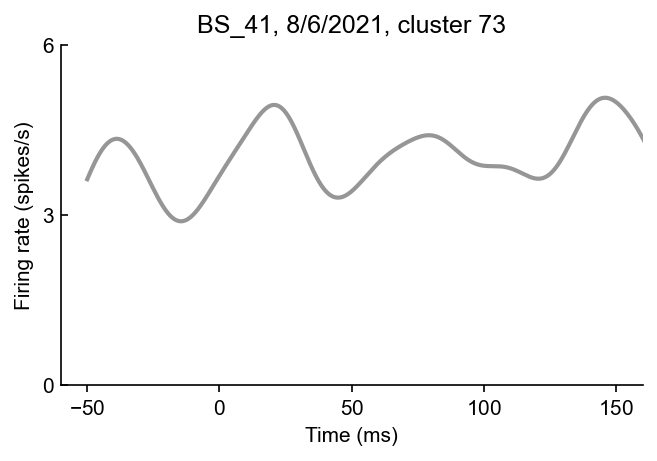

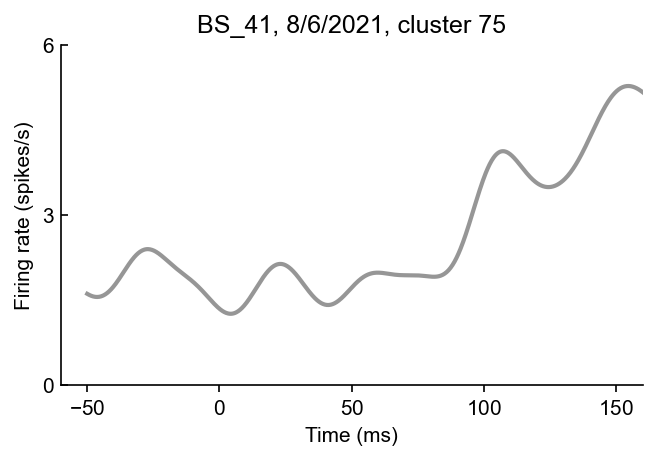

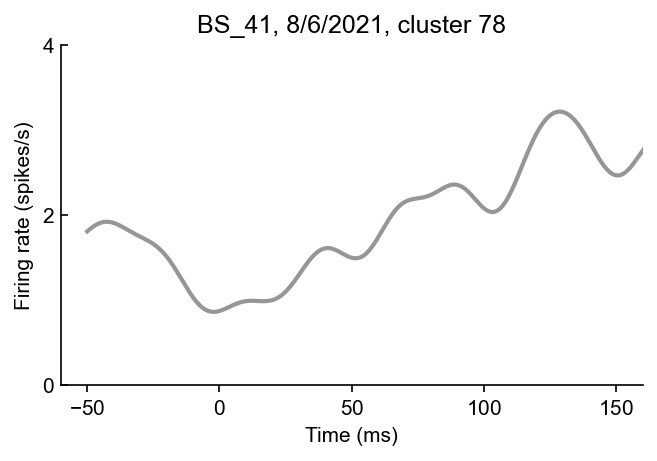

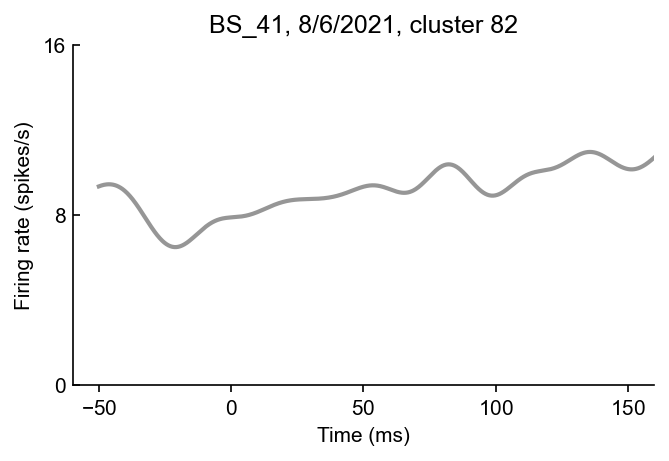

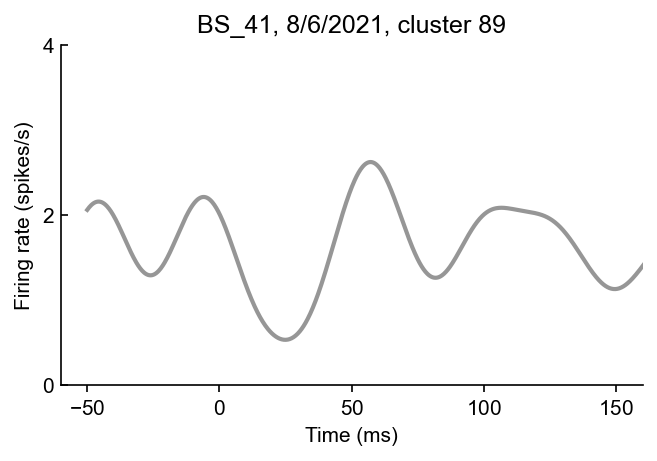

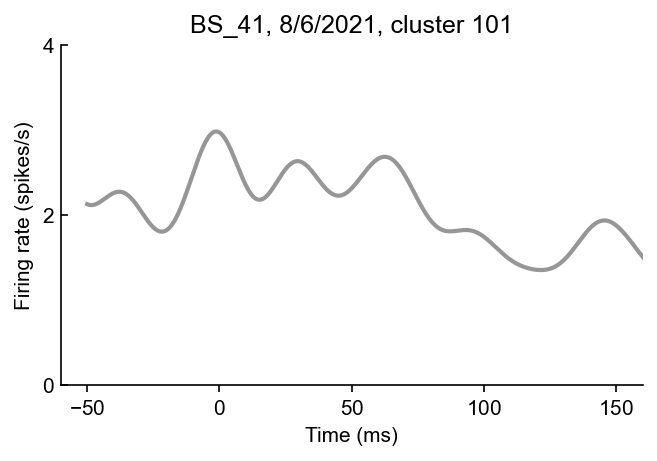

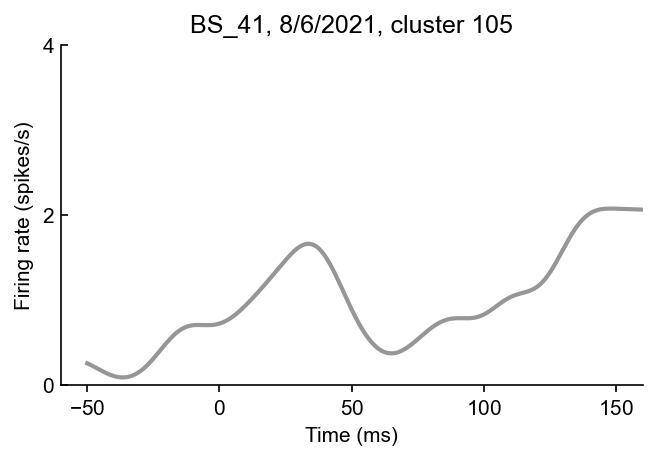

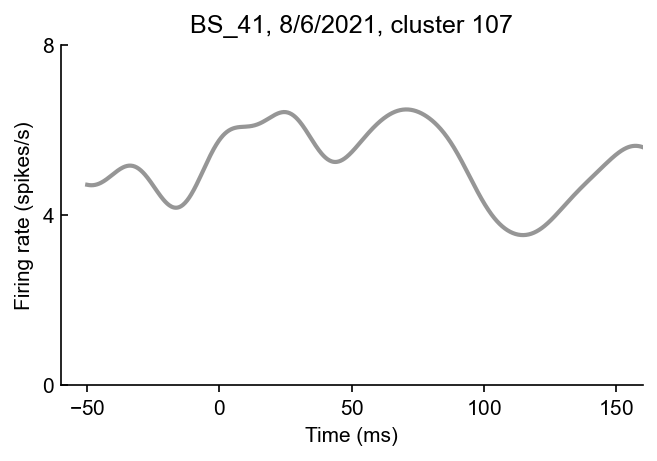

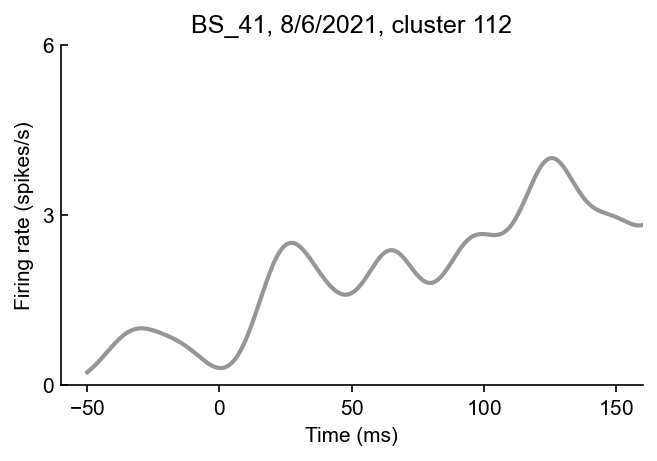

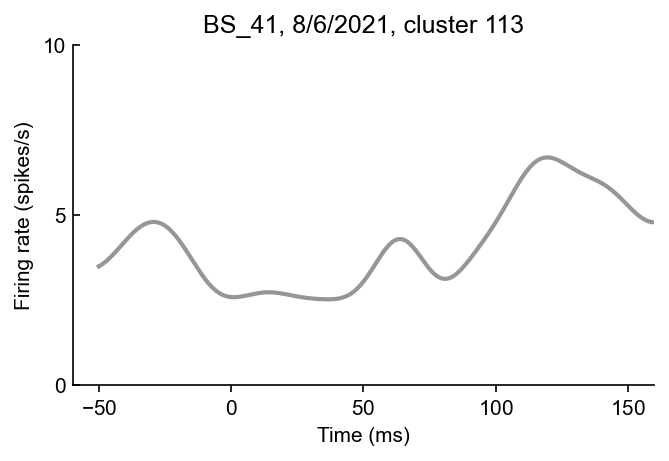

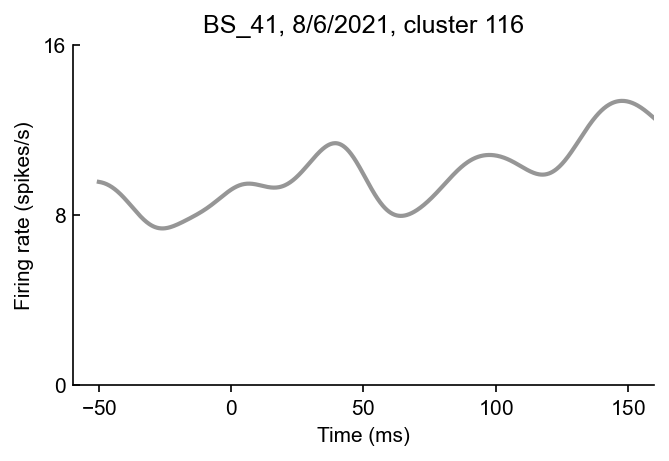

In [98]:
# PSTH
didnotlearnopsinanimals = ['BS_86','BS_100','BS_119','BS_123','BS_128','BS_131','BS_163','BS_174']

starttime = -0.05
endtime = 0.15
numbins = 100 + 1

height=10
width=1
trans=0.125
custommarker = mpl.path.Path([[-width,-height],[-width,height],[width,height],[width,-height]],closed=True)
    
for session in tqdm(os.listdir(ops_directory)):

    try:
        sessionfile = ilep.loadSessionCached(ops_directory,session)
            
        if not sessionfile.meta.animal in didnotlearnopsinanimals:
            continue       

        if sessionfile.meta.cloudy:
            continue
            
        if sessionfile.meta.animal != 'BS_128':
            continue
            
        if sessionfile.meta.day_of_training - animals[sessionfile.meta.animal].reversal != 1:
            continue
            
        neurons = sessionfile.clusters.good

        ##########################################################################################################################
        
        for clust in neurons:
            
            title = str(sessionfile.meta.animal) + str(', ') + str(sessionfile.meta.date) + str(', cluster ') + str(clust)
       
            conditions = []     
            condition = SimpleNamespace()

            laser_on = sessionfile.trials.laser_stimulation
            correct = sessionfile.trials.correct
            laser_on = np.array(np.where(laser_on)[0])
            laser_on = laser_on[np.isin(laser_on,sessionfile.trim[10].trimmed_trials)]
            correct = np.array(np.where(correct)[0])
            correct = correct[np.isin(correct,sessionfile.trim[10].trimmed_trials)]
            laser_on_correct = np.intersect1d(laser_on, correct)      
            
            condition.trials = laser_on_correct
            condition.label = 'ON, correct trial'
            condition.color = LASER_COLOR
            conditions.append(condition)
            condition = SimpleNamespace()

            totaltrials = 0
            for cond in conditions:
                totaltrials += len(cond.trials)
            
            #Caching search -- Unit
            idx = np.equal(sessionfile.spikes.clusters,clust)
            totaltimes = sessionfile.spikes.times[idx]
            

            
            for cond in conditions:
                cond.timestoplot = []
                cond.trialstoplot = []
                cond.peristimulustimes = []
                
                for trialidx,trial in enumerate(cond.trials):
                    trialstart = sessionfile.trials.starts[trial]
                    
                    #Caching search -- Condition
                    idx = np.logical_and(      np.greater(totaltimes,trialstart+starttime*sessionfile.meta.fs-0.25*30000) , np.less(totaltimes,trialstart+endtime*sessionfile.meta.fs+0.25*30000)     )
                    times = totaltimes[idx]
                        
                    #PSTH times
                    cond.peristimulustimes = np.concatenate((cond.peristimulustimes,(times-trialstart)/sessionfile.meta.fs*1000))
            #############################################---PLOTTING---#############################################
            
            fig,ax = plt.subplots(figsize=(5,3))
            
            #Plot PSTHs
            #bw=0.10
            bw=0.05
            xrange = np.linspace(starttime*1000,endtime*1000-starttime*1000,num=1000)
            ind = 0
            max_FR = -np.inf
            for cond in conditions:
                try:
                    KDE = gaussian_kde((cond.peristimulustimes),bw_method=bw).evaluate(xrange)
                    FR = KDE*len(cond.peristimulustimes) / len(cond.trials) * 1000
                    targetmean = len(cond.peristimulustimes) / (endtime-starttime) / len(cond.trials)
                    #if(sigs[ind]):
                    #ax.plot(xrange,targetmean*KDE/np.mean(KDE),c=cond.color,lw=2)
                    ax.plot(xrange,FR,c=cond.color,lw=2)
                    #else:
                    #    ax2.plot(xrange,targetmean*KDE/np.mean(KDE),c=cond.color,lw=2,alpha=0.25)
                    max_FR = max(max_FR,np.max(FR))
                except Exception as e:
                    print('PSTHs: '+str(e))
                ind = ind + 1
                
            ax.set_xlabel('Time (ms)')
            ax.set_ylabel('Firing rate (spikes/s)')
            ax.tick_params(axis='x',direction='out')
            ax.set_xticks([-50,0,50,100,150])
            ax.set_title(title)
            #colors = ['k','b','b','b','k']
            #[t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]
            #[t.set_color(colors[int(idx/2)]) for idx,t in enumerate(ax.xaxis.get_ticklines())]
            #[l.set(color=colors[int(idx/2)]) for idx,l in enumerate(ax.xaxis.get_ticklines())]
            #[print(idx) for idx,t in enumerate(ax.xaxis.get_majoticklines())]
            
            ax.set_xlim(xlimsfromrasters)
            #ax.set_ylim([-5,90])
            #ax.set_yticks([0,30,60,90])
            
            max_FR_value = max_FR * 1.1
            sequence_of_possible_axis_limits = np.array([1,2,4,6,8,10,12,16,20,30,40,50,60,80,100,120,140,150,160,180,200])
            idx_of_okay_limits = np.greater_equal(sequence_of_possible_axis_limits,max_FR_value)
            valid_limits = sequence_of_possible_axis_limits[idx_of_okay_limits]
            limit = np.min(valid_limits)
            ax.set_ylim([0,limit])
            ax.set_yticks([0,limit/2,limit])
            ax.set_yticklabels(['0',str(int(limit/2)),str(limit)])
            
            #ylims = ax.get_ylim()
            #ax.plot([0,100],[ylims[0],ylims[0]],'blue',zorder=10,lw=4)
            #ax.set_ylim(ylims)
            
            #if sessionfile.responsiveness[clust]['all_trials'].FRbaseline < 8:
            #    continue
            
            #break

    except Exception as e:
        pass
    
###########################################################################################################################################

starttime = -0.05
endtime = 0.15
numbins = 100 + 1

height=10
width=1
trans=0.125
custommarker = mpl.path.Path([[-width,-height],[-width,height],[width,height],[width,-height]],closed=True)
    
for session in tqdm(os.listdir(act_directory)):

    try:
        sessionfile = ilep.loadSessionCached(act_directory,session)
            
        if sessionfile.meta.animal not in dualrecanimalnames:
            continue
        
        if sessionfile.meta.day_of_training - animals[sessionfile.meta.animal].reversal != 1:
            continue
            
        if not sessionfile.meta.animal == 'BS_41':
            continue
            
        
        ###### animal days to remove for various reasons
        if sessionfile.meta.animal == 'BS_49' and sessionfile.meta.day_of_training >= 19: # Drops below expert + other complications with data
            continue
        if sessionfile.meta.animal == 'BS_50' and sessionfile.meta.day_of_training >= 13: # Pre-reversal only
            continue
        if sessionfile.meta.animal == 'BS_51' and sessionfile.meta.day_of_training >= 22: # Drops below expert
            continue
        if sessionfile.meta.animal == 'BS_56' and sessionfile.meta.day_of_training >= 22:  # Drops below expert
            continue
        if sessionfile.meta.animal == 'BS_67' and sessionfile.meta.day_of_training >= 15: # Drops below expert
            continue
        ######
            
        neurons = sessionfile.clusters.good

        ##########################################################################################################################
        
        for clust in neurons:
        
            title = str(sessionfile.meta.animal) + str(', ') + str(sessionfile.meta.date) + str(', cluster ') + str(clust)
            
            conditions = []     
            condition = SimpleNamespace()
            
            laser_off_correct =  np.where(sessionfile.trials.correct)[0]    
            
            condition.trials = laser_off_correct
            condition.label = 'Control, correct trial'
            condition.color = GOOD_GREY
            conditions.append(condition)
            condition = SimpleNamespace()

            totaltrials = 0
            for cond in conditions:
                totaltrials += len(cond.trials)
            
            #Caching search -- Unit
            idx = np.equal(sessionfile.spikes.clusters,clust)
            totaltimes = sessionfile.spikes.times[idx]
            

            
            for cond in conditions:
                cond.timestoplot = []
                cond.trialstoplot = []
                cond.peristimulustimes = []
                
                for trialidx,trial in enumerate(cond.trials):
                    trialstart = sessionfile.trials.starts[trial]
                    
                    #Caching search -- Condition
                    idx = np.logical_and(      np.greater(totaltimes,trialstart+starttime*sessionfile.meta.fs-0.25*30000) , np.less(totaltimes,trialstart+endtime*sessionfile.meta.fs+0.25*30000)     )
                    times = totaltimes[idx]
                        
                    #PSTH times
                    cond.peristimulustimes = np.concatenate((cond.peristimulustimes,(times-trialstart)/sessionfile.meta.fs*1000))
            #############################################---PLOTTING---#############################################
            
            fig,ax = plt.subplots(figsize=(5,3))
            
            #Plot PSTHs
            #bw=0.10
            bw=0.05
            xrange = np.linspace(starttime*1000,endtime*1000-starttime*1000,num=1000)
            ind = 0
            max_FR = -np.inf
            for cond in conditions:
                try:
                    KDE = gaussian_kde((cond.peristimulustimes),bw_method=bw).evaluate(xrange)
                    FR = KDE*len(cond.peristimulustimes) / len(cond.trials) * 1000
                    targetmean = len(cond.peristimulustimes) / (endtime-starttime) / len(cond.trials)
                    #if(sigs[ind]):
                    #ax.plot(xrange,targetmean*KDE/np.mean(KDE),c=cond.color,lw=2)
                    ax.plot(xrange,FR,c=cond.color,lw=2)
                    #else:
                    #    ax2.plot(xrange,targetmean*KDE/np.mean(KDE),c=cond.color,lw=2,alpha=0.25)
                    max_FR = max(max_FR,np.max(FR))
                except Exception as e:
                    print('PSTHs: '+str(e))
                ind = ind + 1
                
            ax.set_xlabel('Time (ms)')
            ax.set_ylabel('Firing rate (spikes/s)')
            ax.tick_params(axis='x',direction='out')
            ax.set_xticks([-50,0,50,100,150])
            #colors = ['k','b','b','b','k']
            #[t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]
            #[t.set_color(colors[int(idx/2)]) for idx,t in enumerate(ax.xaxis.get_ticklines())]
            #[l.set(color=colors[int(idx/2)]) for idx,l in enumerate(ax.xaxis.get_ticklines())]
            #[print(idx) for idx,t in enumerate(ax.xaxis.get_majoticklines())]
            
            ax.set_xlim(xlimsfromrasters)
            #ax.set_ylim([-5,90])
            #ax.set_yticks([0,30,60,90])
            
            max_FR_value = max_FR * 1.1
            sequence_of_possible_axis_limits = np.array([1,2,4,6,8,10,12,16,20,30,40,50,60,80,100,120,140,150,160,180,200])
            idx_of_okay_limits = np.greater_equal(sequence_of_possible_axis_limits,max_FR_value)
            valid_limits = sequence_of_possible_axis_limits[idx_of_okay_limits]
            limit = np.min(valid_limits)
            ax.set_ylim([0,limit])
            ax.set_yticks([0,limit/2,limit])
            ax.set_yticklabels(['0',str(int(limit/2)),str(limit)])
            ax.set_title(title)
            
            #ylims = ax.get_ylim()
            #ax.plot([0,100],[ylims[0],ylims[0]],'blue',zorder=10,lw=4)
            #ax.set_ylim(ylims)
            
            #if sessionfile.responsiveness[clust]['all_trials'].FRbaseline < 8:
            #    continue
            
            #break

    except Exception as e:
        pass

100%|██████████| 533/533 [00:06<00:00, 80.92it/s] 


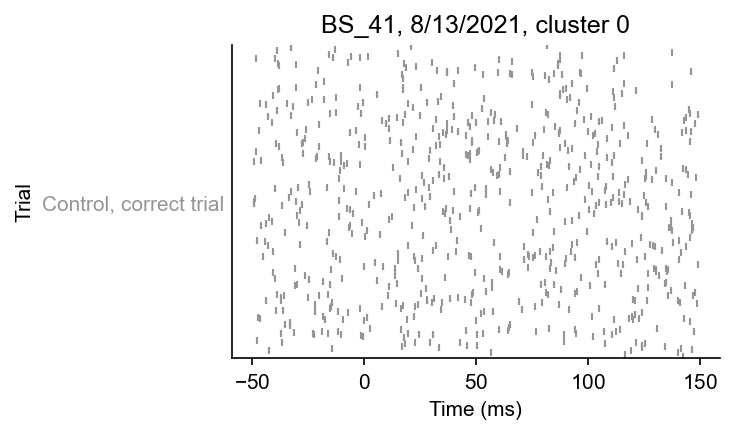

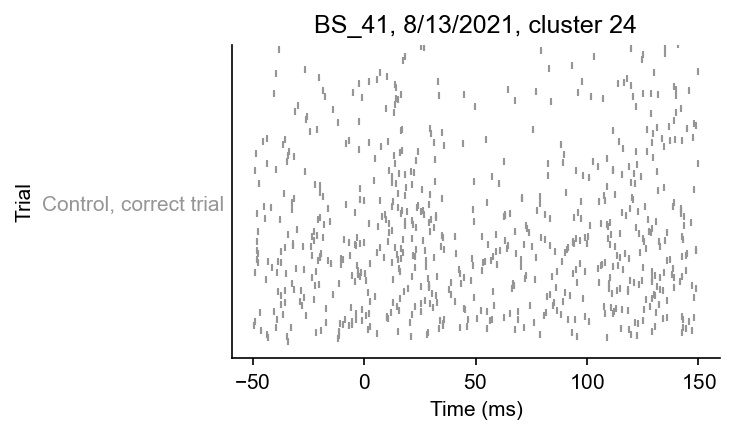

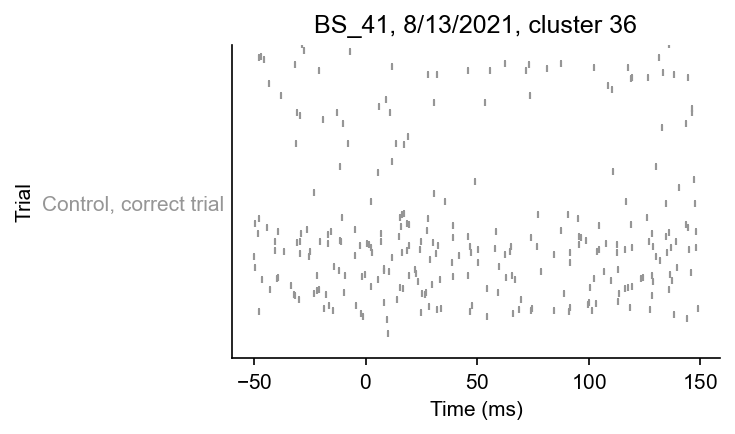

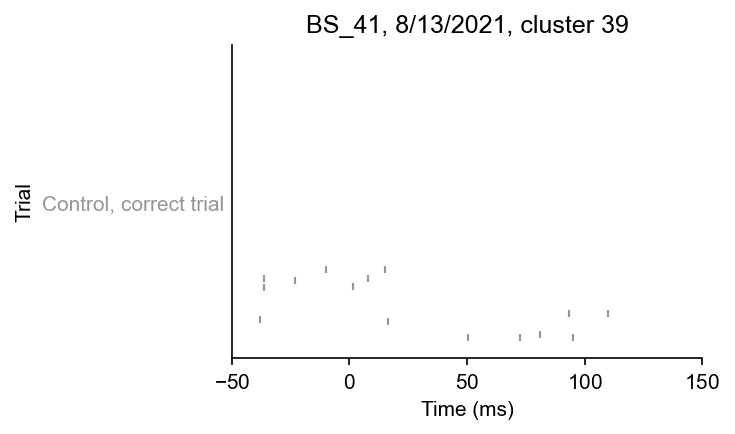

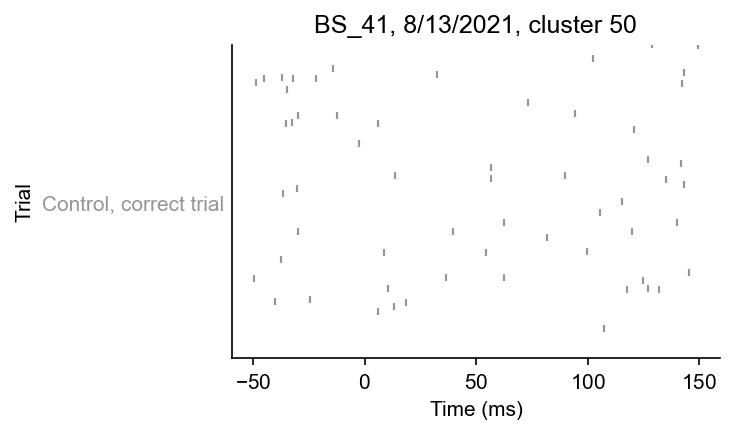

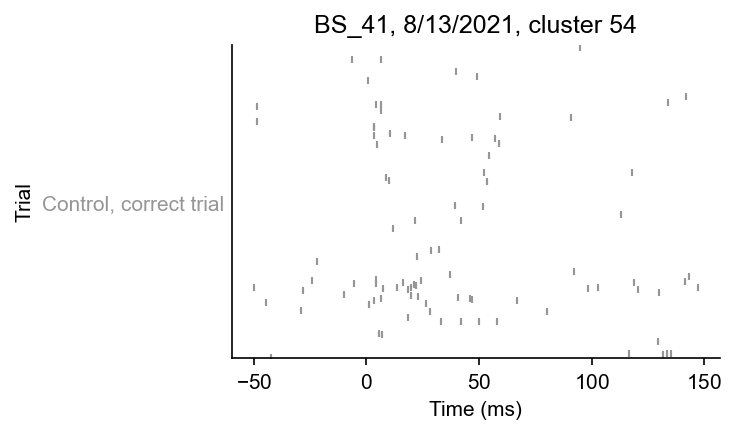

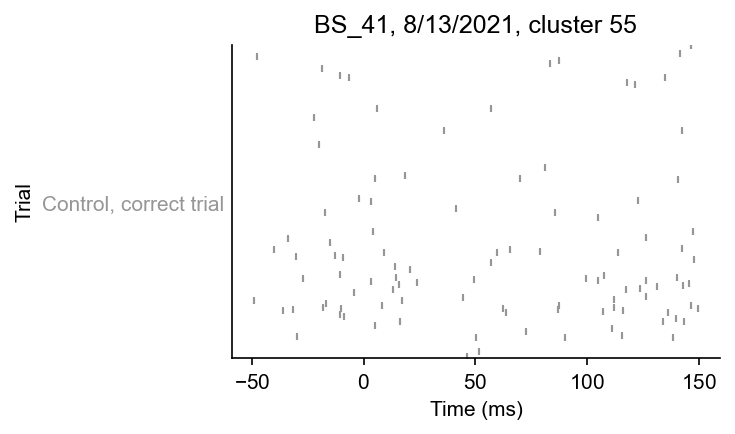

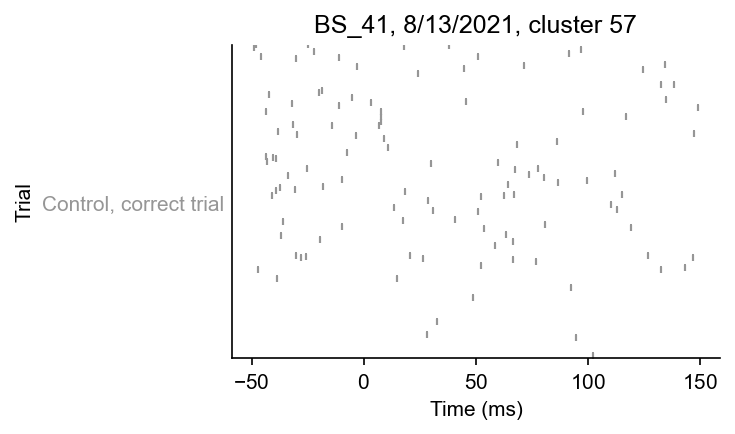

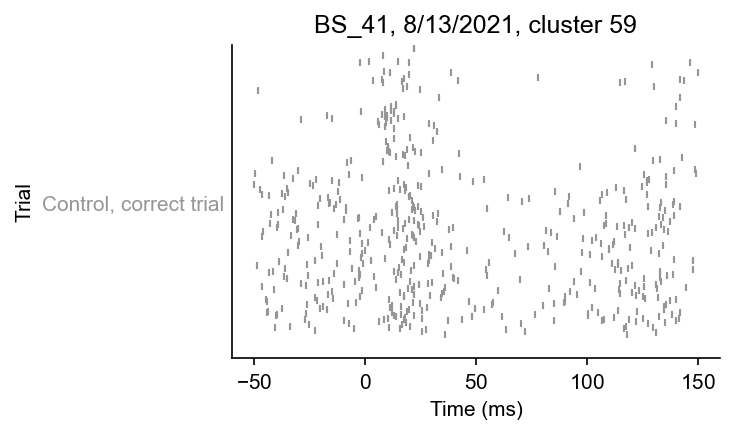

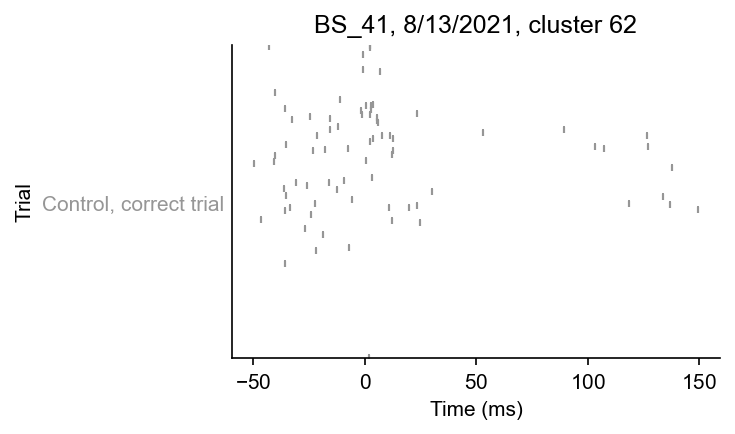

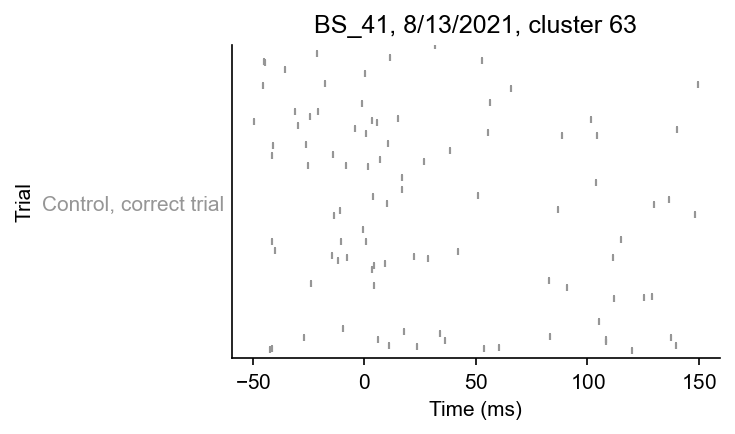

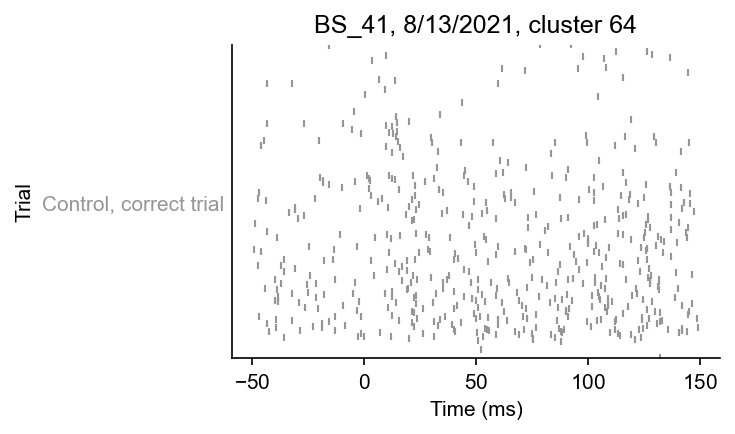

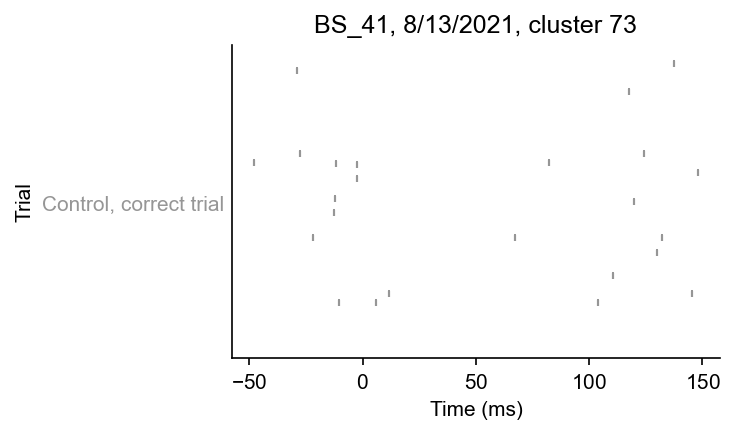

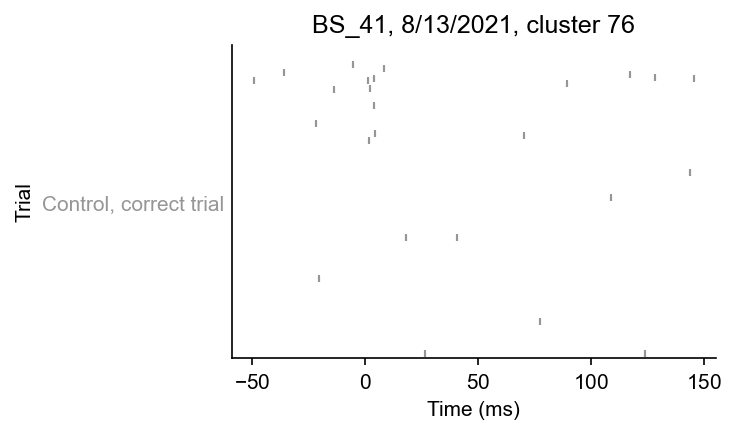

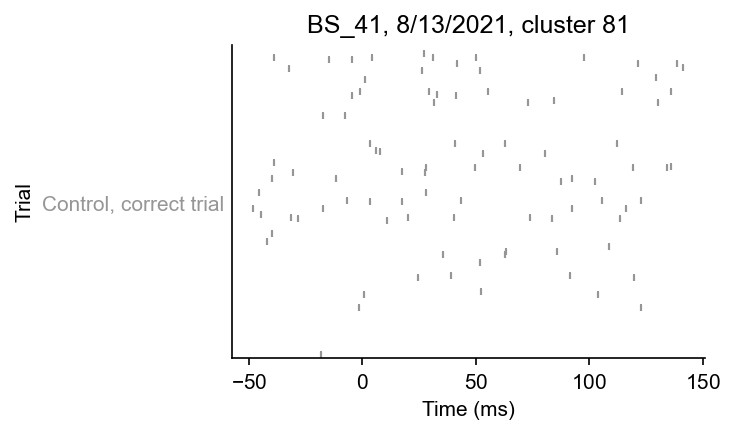

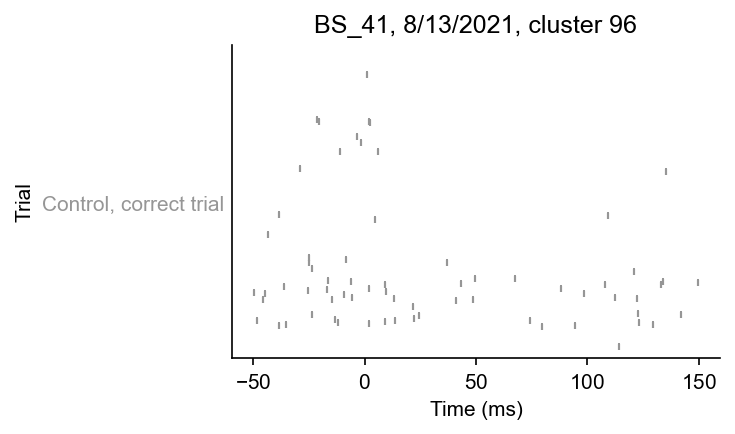

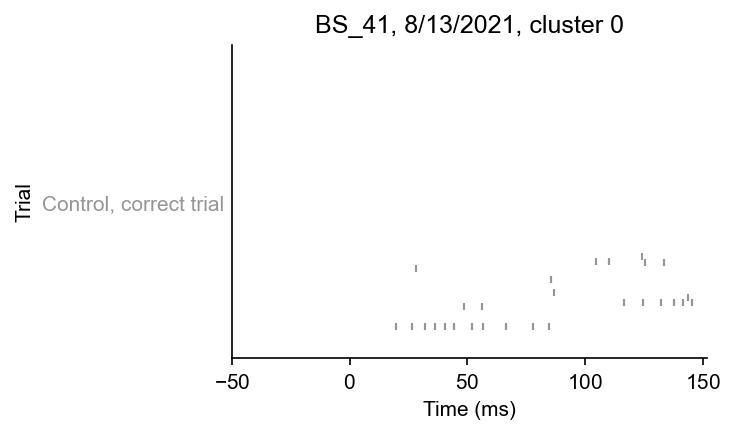

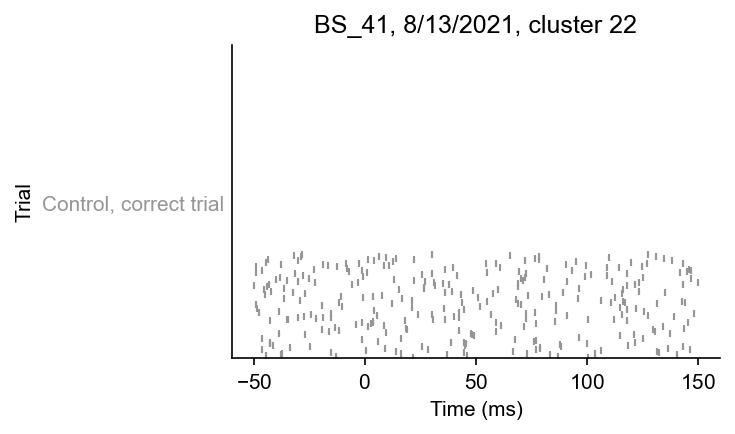

In [93]:
# RASTER PLOTS

starttime = -0.05
endtime = 0.15
numbins = 100 + 1

height=10
width=1
trans=0.125
custommarker = mpl.path.Path([[-width,-height],[-width,height],[width,height],[width,-height]],closed=True)
    
    
# computing trials and plotting PSTHs for Opsin LASER ON trials
for session in tqdm(os.listdir(ops_directory)):
    
    try:
        sessionfile = ilep.loadSessionCached(ops_directory,session)
            
        if not sessionfile.meta.animal in didnotlearnopsinanimals:
            continue

        if sessionfile.meta.cloudy:
            continue
        
        if sessionfile.meta.day_of_recording - animals[sessionfile.meta.animal].reversal != 1:
            continue
            
        if sessionfile.meta.animal != 'BS_123':
            continue
            
        neurons = sessionfile.clusters.good
        
        for clust in neurons:
            title = str(sessionfile.meta.animal) + str(', ') + str(sessionfile.meta.date) + str(', cluster ') + str(clust)

        
            conditions = []     
            condition = SimpleNamespace()

            laser_on = sessionfile.trials.laser_stimulation
            correct = sessionfile.trials.correct
            laser_on = np.array(np.where(laser_on)[0])
            laser_on = laser_on[np.isin(laser_on,sessionfile.trim[10].trimmed_trials)]
            correct = np.array(np.where(correct)[0])
            correct = correct[np.isin(correct,sessionfile.trim[10].trimmed_trials)]
            laser_on_correct = np.intersect1d(laser_on, correct)      
            
            condition.trials = laser_on_correct
            condition.label = 'ON, correct trial'
            condition.color = LASER_COLOR
            conditions.append(condition)
            condition = SimpleNamespace()

            totaltrials = 0
            for cond in conditions:
                totaltrials += len(cond.trials)
            
            #Caching search -- Unit
            idx = np.equal(sessionfile.spikes.clusters,clust)
            totaltimes = sessionfile.spikes.times[idx]
            
            for cond in conditions:
                cond.timestoplot = []
                cond.trialstoplot = []
                
                for trialidx,trial in enumerate(cond.trials):
                    trialstart = sessionfile.trials.starts[trial]
                    
                    #Caching search -- Condition
                    idx = np.logical_and(      np.greater(totaltimes,trialstart+starttime*sessionfile.meta.fs) , np.less(totaltimes,trialstart+endtime*sessionfile.meta.fs)     )
                    times = totaltimes[idx]
                    
                    #Each spike time to plot
                    for spike in ((times-trialstart)/sessionfile.meta.fs*1000):
                        cond.timestoplot.append(spike)
                        cond.trialstoplot.append(trialidx+1)
                        
            #############################################---PLOTTING---#############################################     
            #plt.close('all')
            fig,ax = plt.subplots(figsize=(5,3))
            
            offset = 0
            tickmeans = []
            ticklabels = []
            numtrials = 0
            for cond in conditions:
                ax.scatter(cond.timestoplot,np.array(cond.trialstoplot)+offset,s=7.5,c=cond.color,marker=custommarker.vertices)
                
                if cond.label == 'ON, correct trial':
                    starttrial = offset
                    endtrial = offset+len(cond.trials)
                
                tickmeans.append(0.5*len(cond.trials)+offset)
                offset += len(cond.trials)
                ticklabels.append(cond.label)
                numtrials += len(cond.trials)
            ylims1 = [1,numtrials]
            ax.set_ylim(ylims1)
            ax.set_yticks(tickmeans)
            ax.set_yticklabels(ticklabels)       
            ax.tick_params(axis='y',length=0)
            colors = [cond.color for cond in conditions]
            [t.set_color(colors[idx]) for idx,t in enumerate(ax.yaxis.get_ticklabels())]
            ax.tick_params(axis='x',direction='out')
            ax.set_xticks([-50,0,50,100,150])    
            ax.set_ylabel('Trial')
            ax.set_xlabel('Time (ms)')
            ax.set_title(title)
            
            xlimsfromrasters = ax.get_xlim()
            
            plt.tight_layout()

    except Exception as e:
        pass
    
    
########################################################################################################################## 
# computing trials and plotting PSTHs for control laser OFF trials
for session in tqdm(os.listdir(act_directory)):
    #break
    try:
        sessionfile = ilep.loadSessionCached(act_directory,session)
        
        if sessionfile.meta.day_of_recording - animals[sessionfile.meta.animal].reversal != 1:
            continue
            
        if not sessionfile.meta.animal in dualrecanimalnames:
            continue
        
        if not sessionfile.meta.animal == 'BS_41':
            continue
            
        
        ###### animal days to remove for various reasons
        if sessionfile.meta.animal == 'BS_49' and sessionfile.meta.day_of_training >= 19: # Drops below expert + other complications with data
            continue
        if sessionfile.meta.animal == 'BS_50' and sessionfile.meta.day_of_training >= 13: # Pre-reversal only
            continue
        if sessionfile.meta.animal == 'BS_51' and sessionfile.meta.day_of_training >= 22: # Drops below expert
            continue
        if sessionfile.meta.animal == 'BS_56' and sessionfile.meta.day_of_training >= 22:  # Drops below expert
            continue
        if sessionfile.meta.animal == 'BS_67' and sessionfile.meta.day_of_training >= 15: # Drops below expert
            continue
        ######
            
        neurons = sessionfile.clusters.good
        
        for clust in neurons:
            title = str(sessionfile.meta.animal) + str(', ') + str(sessionfile.meta.date) + str(', cluster ') + str(clust)

        
            conditions = []     
            condition = SimpleNamespace()
            
            laser_off_correct =  np.where(sessionfile.trials.correct)[0]    
            
            condition.trials = laser_off_correct
            condition.label = 'Control, correct trial'
            condition.color = GOOD_GREY
            conditions.append(condition)
            condition = SimpleNamespace()

            totaltrials = 0
            for cond in conditions:
                totaltrials += len(cond.trials)
            
            #Caching search -- Unit
            idx = np.equal(sessionfile.spikes.clusters,clust)
            totaltimes = sessionfile.spikes.times[idx]
            
            for cond in conditions:
                cond.timestoplot = []
                cond.trialstoplot = []
                
                for trialidx,trial in enumerate(cond.trials):
                    trialstart = sessionfile.trials.starts[trial]
                    
                    #Caching search -- Condition
                    idx = np.logical_and(      np.greater(totaltimes,trialstart+starttime*sessionfile.meta.fs) , np.less(totaltimes,trialstart+endtime*sessionfile.meta.fs)     )
                    times = totaltimes[idx]
                    
                    #Each spike time to plot
                    for spike in ((times-trialstart)/sessionfile.meta.fs*1000):
                        cond.timestoplot.append(spike)
                        cond.trialstoplot.append(trialidx+1)
                        
            #############################################---PLOTTING---#############################################     
            #plt.close('all')
            fig,ax = plt.subplots(figsize=(5,3))
            
            
            offset = 0
            tickmeans = []
            ticklabels = []
            numtrials = 0
            for cond in conditions:
                ax.scatter(cond.timestoplot,np.array(cond.trialstoplot)+offset,s=7.5,c=cond.color,marker=custommarker.vertices)
                
                if cond.label == 'Control, correct trial':
                    starttrial = offset
                    endtrial = offset+len(cond.trials)
                
                tickmeans.append(0.5*len(cond.trials)+offset)
                offset += len(cond.trials)
                ticklabels.append(cond.label)
                numtrials += len(cond.trials)
            ylims1 = [1,numtrials]
            ax.set_ylim(ylims1)
            ax.set_yticks(tickmeans)
            ax.set_yticklabels(ticklabels)       
            ax.tick_params(axis='y',length=0)
            colors = [cond.color for cond in conditions]
            [t.set_color(colors[idx]) for idx,t in enumerate(ax.yaxis.get_ticklabels())]
            ax.tick_params(axis='x',direction='out')
            ax.set_xticks([-50,0,50,100,150])    
            ax.set_ylabel('Trial')
            ax.set_xlabel('Time (ms)')
            ax.set_title(title)
            
            xlimsfromrasters = ax.get_xlim()
            
            plt.tight_layout()

    except Exception as e:
        pass